# Importing packages:

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import locale
locale.setlocale(locale.LC_ALL, 'en_US.utf8')

pd.set_option("display.float.format",lambda x: locale.format('%.2f',x,grouping=True))
pd.set_option("display.max_columns",1000)
pd.set_option("display.max_rows",1000)

In [3]:
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# importing all packages required for building a logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler            
from sklearn.feature_selection import RFE           
from sklearn.metrics import accuracy_score ,roc_curve,roc_auc_score,precision_recall_curve
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels
import statsmodels.api as sm
import sklearn 
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Data Understanding:

In [4]:
df=pd.read_csv('midtermgentdataFinal.csv')

In [5]:
df.head(3)

,pin14,area,area_num_1,assessorbl,assessornb,censustrac,chicagowar,comarea,comarea_id,commission,community,congressio,elemschlta,highschlta,parceltype,perimeter,politicalt,staterepre,statesenat,taxcode,tifdistric,unitschlta,Year,Class,Township name,Township,CCAO Neighborhood,Tax code,CCAO mailed AV,CCAO certified AV,BOR certified AV (final),Appeal filed with CCAO,CCAO reviews,CCAO adjustment indicator,Appeal filed with BOR,BOR adjustment indicator,Property Index Number,Assessment Triad,Property Class,Property Address,Property Apartment Num.,Property City,Township me,Township Code2,Neighborhood Code,Township Neighborhood Only,Modeling Group,Proportion Assessed,Multi Code Indicator,Multi Code,Number of Active 288s (HIEs),Number of Ended 288s (HIEs),Sale Date,Sale Price,Sale Document Number,Land Square Feet,Large Home Indicator,Age,Apartments,Wall Material,Roof Material,Rooms,Bedrooms,Basement,Basement Finish,Central Heating,Central Air Conditioning,Fireplaces,Attic Type,Full Baths,Half Baths,Design Plan,Cathedral Ceiling,Garage 1 Size,Garage 1 Material,Garage 1 Attached,Garage 1 Area,Building Square Feet,Repair Condition,Use,Type of Residence,Attic Finish,Renovation,Porch,Property Zip Code,OHare Noise Indicator,FEMA Floodplain,Flood Risk Factor,Flood Risk Direction,Road Proximity < 100 Feet,Road Proximity 101 - 300 Feet,Elementary/Middle School District,High School District,Tax Rate,Tract Median Income,Condo Model: Building PIN,Condo Model: Modeled Unit Strata (of 10),Condo Model: Modeled Unit Strata (of 300),Modeled Sale Year,Modeled Sale Month of Year,Modeled Sale Day of Year,Modeled Sale Week of Year,Modeled Sale Quarter of Year,Modeled Sale Quarter,Modeled Sale Month,Modeled Sale Week,Modeled Sale Day,Modeled Sale During School Year,Modeled Sale During Holidays,CommsortIndex,Community Area,Comm VGentIndex- 1970,Comm VGentIndex- 1980,Comm VGentIndex- 1990,Comm VGentIndex- 2000,Comm VGentIndex- 2010,Comm VGentIndex- 1970-2010,Comm - Single Family,Comm - Condominium,Comm - Building with 2-4 Units,Comm - Building with 5+ Units,Comm - All Residential Properties,Comm - Cost-Burdened Owner-Occupied Households,Comm - Cost-Burdened Renter-Occupied Household,Comm - Share of All Households Cost-Burdened,Comm - Share of Households that are Owner-Occupied,Comm - Share of Households that are Renter-Occupied,Comm - Total Households,Comm - Share of Population that is under the Poverty Level,Comm - Share of Households with Income Less than $25000,Comm - Share of Households with Income $25000 to $50000,Comm - Share of Households with Income $50000 to $100000,Comm - Share of Households with Income $100000 or More,Comm - Total Households_[0],Comm - Share of Population that is White,Comm - Share of Population that is African American,Comm - Share of Population that is Hispanic or Latino,Comm - Share of Population that is Asian,Comm - Share of Population that is Some Other Race,Comm - Share of Population Aged under 18,Comm - Share of Population Aged 18 to 44,Comm - Share of Population Aged 45 to 64,Comm - Share of Population Aged over 65,Comm - Total Population
0,24-23-106-003-0000,0,74,NaN,NaN,17031740400,19,0,0,11,MOUNT GREENWOOD,3,NaN,NaN,1,0,Town of Lake,35,18,NaN,NaN,BOARD OF EDUCATION,2020,203,Lake,72,422,72003,22701,20884,20884,False,0,False,False,False,24-23-106-003-0000,City,203,3611 W 112TH PL,NaN,CHICAGO,Lake,72,72422,422,SF,1.00,0,2.00,0,0,NaN,NaN,NaN,4950,False,66,NaN,Frame,Shingle + Asphalt,4,3,Slab,Unfinished,Warm Air Furce,No Central A/C,0.00,None,1,0,NaN,NaN,1 cars,Frame,False,False,1165,Average,Single-Family,1 Story,NaN,NaN,NaN,60655-3401,0,0,1,0,0,0,CASSELL,MORGAN PARK HS,6.91,85798,NaN,NaN,NaN,2021,Jan,1,1,Q1,96,288,1252,8766,True,True,47,Mount Greenwood,9,7,7,7,5,-4,0.86,0.04,0.03,0.07,1,0.17,0.32,0.19,0.86,0.14,6692,0.05,0.10,0.14,0.25,0.51,6692,0.83,0.04,0.10,0.02,0.01,0.24,0.35,0.28,0.12,19190
1,24-23-104-003-0000,0,74,NaN,NaN,17031740400,19,0,0,11,MOUNT GREENWOOD,3,NaN,NaN,1,0,Town of Lake,35,18,NaN,NaN,BOARD OF EDUCATION

In [6]:
df.shape

(201092, 144)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201092 entries, 0 to 201091
Columns: 144 entries, pin14 to Comm - Total Population
dtypes: bool(7), float64(38), int64(60), object(39)
memory usage: 211.5+ MB


In [8]:
df.describe()

,area,area_num_1,assessorbl,assessornb,censustrac,chicagowar,comarea,comarea_id,commission,congressio,elemschlta,highschlta,parceltype,perimeter,staterepre,statesenat,taxcode,Year,Class,Township,CCAO Neighborhood,Tax code,CCAO mailed AV,CCAO certified AV,BOR certified AV (final),CCAO reviews,Property Class,Township Code2,Neighborhood Code,Township Neighborhood Only,Proportion Assessed,Multi Code Indicator,Multi Code,Number of Active 288s (HIEs),Number of Ended 288s (HIEs),Sale Price,Sale Document Number,Land Square Feet,Age,Apartments,Rooms,Bedrooms,Fireplaces,Full Baths,Half Baths,Building Square Feet,OHare Noise Indicator,FEMA Floodplain,Flood Risk Factor,Flood Risk Direction,Road Proximity < 100 Feet,Road Proximity 101 - 300 Feet,Tax Rate,Tract Median Income,Condo Model: Building PIN,Condo Model: Modeled Unit Strata (of 10),Condo Model: Modeled Unit Strata (of 300),Modeled Sale Year,Modeled Sale Day of Year,Modeled Sale Week of Year,Modeled Sale Quarter,Modeled Sale Month,Modeled Sale Week,Modeled Sale Day,CommsortIndex,Comm VGentIndex- 1970,Comm VGentIndex- 1980,Comm VGentIndex- 1990,Comm VGentIndex- 2000,Comm VGentIndex- 2010,Comm VGentIndex- 1970-2010,Comm - Single Family,Comm - Condominium,Comm - Building with 2-4 Units,Comm - Building with 5+ Units,Comm - All Residential Properties,Comm - Cost-Burdened Owner-Occupied Households,Comm - Cost-Burdened Renter-Occupied Household,Comm - Share of All Households Cost-Burdened,Comm - Share of Households that are Owner-Occupied,Comm - Share of Households that are Renter-Occupied,Comm - Total Households,Comm - Share of Population that is under the Poverty Level,Comm - Share of Households with Income Less than $25000,Comm - Share of Households with Income $25000 to $50000,Comm - Share of Households with Income $50000 to $100000,Comm - Share of Households with Income $100000 or More,Comm - Total Households_[0],Comm - Share of Population that is White,Comm - Share of Population that is African American,Comm - Share of Population that is Hispanic or Latino,Comm - Share of Population that is Asian,Comm - Share of Population that is Some Other Race,Comm - Share of Population Aged under 18,Comm - Share of Population Aged 18 to 44,Comm - Share of Population Aged 45 to 64,Comm - Share of Population Aged over 65,Comm - Total Population
count,"201,092.00","201,092.00","102,762.00","102,762.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00",0.00,0.00,"201,092.00","201,092.00","201,092.00","201,092.00",0.00,"201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,017.00","201,092.00","201,092.00","19,602.00","19,602.00","201,092.00","201,092.00",0.00,"201,092.00","201,092.00","201,024.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00",0.00,0.00,0.00,"201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00","201,092.00"
mean,0.00,44.74,203.06,174.75,"17,031,479,303.28",23.51,0.00,0.00,7.14,3.44,NaN,NaN,1.00,0.00,22.28,11.42,NaN,"2,020.00",202.94,71.89,193.06,"71,915.79","19,725.27","17,707.54","17,663.25",0.03,202.76,71.89,"72,079.12",193.06,0.99,0.01,2.02,0.01,0.01,"231,440.61","1,919,250,738.75","4,107.87",85.95,NaN,5.34,2.80,0.07,1.16,0.22,"1,173.38",0.02,0.00,1.82,0.16,0.00,0.06,6.91,"56,387.27",NaN,NaN,NaN,"2,021.00",1.00,1.00,96.00,288.00,"1,252.00","8,766.00",36.13,4.0

# Data cleaning:

## Null values:

In [9]:
df.size

28957248

In [10]:
df.isnull().sum().sum()

3311132

In [11]:
# Null values percentage

(df.isnull().sum().sum()/df.size)*100

11.434553449278052

In [12]:
# In total, 11.4% values are null in the data.

In [13]:
x = pd.DataFrame()
x['Columns'] = df.columns
x['Data_type']  = df.dtypes.values
x['Unique_count'] = df.nunique().values
x['null_value_percentage'] = df.isnull().sum().values*100/len(df)
x['null_value_percentage'] = x['null_value_percentage'].apply(lambda x: round(x,2))
x=x.sort_values(by='null_value_percentage',ascending=False)            
# creating a new dataframe with column names,Data type,Unique values and their percentage of null values sort
# on descending order of null_value_percentage
x

,Columns,Data_type,Unique_count,null_value_percentage
19,taxcode,float64,0,100.00
95,Condo Model: Building PIN,float64,0,100.00
96,Condo Model: Modeled Unit Strata (of 10),float64,0,100.00
97,Condo Model: Modeled Unit Strata (of 300),float64,0,100.00
13,highschlta,float64,0,100.00
12,elemschlta,float64,0,100.00
58,Apartments,float64,0,100.00
82,Renovation,object,2,99.85
40,Property Apartment Num.,object,203,93.47
20,tifdistric,object,88,90.90


In [14]:
# dropping columns with more than 40% null values

null_df=x[x['null_value_percentage']>40]
df.drop(list(null_df.Columns),axis=1,inplace=True)

In [15]:
df.shape

(201092, 125)

In [16]:
(df.isnull().sum().sum()/df.size)*100

0.48052831539792734

In [17]:
#Imputing the remaining null values,we use mean to impute null values in numerical variables and mode for categorical variables.
for i in df.columns:
    if df[i].dtype=='float64' or df[i].dtype=='int64':
        df[i].fillna(df[i].mean(),inplace=True)
    else:
        df[i].fillna(df[i].mode()[0],inplace=True)

In [18]:
df.isnull().sum().sum()

0

## Deleting columns with one unique value

In [19]:
# some of the columns have only one unique values, which makes them insignificant for modeling.
# so, we can drop those variables.

unique_df=x[x['Unique_count']==1]
df.drop(list(unique_df.Columns),axis=1,inplace=True)

In [20]:
df.shape

(201092, 102)

## Checking for duplicates:    

In [21]:
df.duplicated().value_counts()

False    201082
True         10
dtype: int64

In [22]:
# we only have 10 duplicated rows, we can drop them.

df=df[~df.duplicated()]

In [23]:
df.shape

(201082, 102)

## Checking for Imbalanced variables:

In [24]:
df.head(3)

,pin14,area_num_1,censustrac,chicagowar,commission,community,congressio,parceltype,politicalt,staterepre,statesenat,Class,Township name,Township,CCAO Neighborhood,Tax code,CCAO mailed AV,CCAO certified AV,BOR certified AV (final),Appeal filed with CCAO,CCAO reviews,CCAO adjustment indicator,BOR adjustment indicator,Property Index Number,Property Class,Property Address,Township me,Township Code2,Neighborhood Code,Township Neighborhood Only,Proportion Assessed,Multi Code Indicator,Multi Code,Number of Active 288s (HIEs),Number of Ended 288s (HIEs),Land Square Feet,Age,Wall Material,Roof Material,Rooms,Bedrooms,Basement,Basement Finish,Central Heating,Central Air Conditioning,Fireplaces,Attic Type,Full Baths,Half Baths,Garage 1 Size,Garage 1 Material,Garage 1 Attached,Garage 1 Area,Building Square Feet,Repair Condition,Use,Type of Residence,Property Zip Code,OHare Noise Indicator,FEMA Floodplain,Flood Risk Factor,Flood Risk Direction,Road Proximity < 100 Feet,Road Proximity 101 - 300 Feet,Elementary/Middle School District,High School District,Tax Rate,Tract Median Income,CommsortIndex,Community Area,Comm VGentIndex- 1970,Comm VGentIndex- 1980,Comm VGentIndex- 1990,Comm VGentIndex- 2000,Comm VGentIndex- 2010,Comm VGentIndex- 1970-2010,Comm - Single Family,Comm - Condominium,Comm - Building with 2-4 Units,Comm - Building with 5+ Units,Comm - Cost-Burdened Owner-Occupied Households,Comm - Cost-Burdened Renter-Occupied Household,Comm - Share of All Households Cost-Burdened,Comm - Share of Households that are Owner-Occupied,Comm - Share of Households that are Renter-Occupied,Comm - Total Households,Comm - Share of Population that is under the Poverty Level,Comm - Share of Households with Income Less than $25000,Comm - Share of Households with Income $25000 to $50000,Comm - Share of Households with Income $50000 to $100000,Comm - Share of Households with Income $100000 or More,Comm - Total Households_[0],Comm - Share of Population that is White,Comm - Share of Population that is African American,Comm - Share of Population that is Hispanic or Latino,Comm - Share of Population that is Asian,Comm - Share of Population that is Some Other Race,Comm - Share of Population Aged under 18,Comm - Share of Population Aged 18 to 44,Comm - Share of Population Aged 45 to 64,Comm - Share of Population Aged over 65,Comm - Total Population
0,24-23-106-003-0000,74,17031740400,19,11,MOUNT GREENWOOD,3,1,Town of Lake,35,18,203,Lake,72,422,72003,22701,20884,20884,False,0,False,False,24-23-106-003-0000,203,3611 W 112TH PL,Lake,72,72422,422,1.00,0,2.00,0,0,4950,66,Frame,Shingle + Asphalt,4,3,Slab,Unfinished,Warm Air Furce,No Central A/C,0.00,None,1,0,1 cars,Frame,False,False,1165,Average,Single-Family,1 Story,60655-3401,0,0,1,0,0,0,CASSELL,MORGAN PARK HS,6.91,85798,47,Mount Greenwood,9,7,7,7,5,-4,0.86,0.04,0.03,0.07,0.17,0.32,0.19,0.86,0.14,6692,0.05,0.10,0.14,0.25,0.51,6692,0.83,0.04,0.10,0.02,0.01,0.24,0.35,0.28,0.12,19190
1,24-23-104-003-0000,74,17031740400,19,11,MOUNT GREENWOOD,3,1,Town of Lake,35,18,203,Lake,72,422,72003,22287,20504,20504,False,0,False,False,24-23-104-003-0000,203,3641 W 113TH PL,Lake,72,72422,422,1.00,0,2.00,0,0,4950,56,Masonry,Shingle + Asphalt,5,3,Full,Unfinished,Warm Air Furce,Central A/C,0.00,None,1,0,2 cars,Frame,False,False,1136,Average,Single-Family,1 Story,60655-3407,0,0,1,0,0,0,CASSELL,MORGAN PARK HS,6.91,85798,47,Mount Greenwood,9,7,7,7,5,-4,0.86,0.04,0.03,0.07,0.17,0.32,0.19,0.86,0.14,6692,0.05,0.10,0.14,0.25,0.51,6692,0.83,0.04,0.10,0.02,0.01,0.24,0.35,0.28,0.12,19190
2,13-07-102-038-0000,10,17031100600,41,9,NORWOOD PARK,5,1,TOWN OF JEFFERSON,20,10,517,Jefferson,71,430,71001,55859,55859,55859,False,0,False,False,13-07-102-038-0000,202,7050 W HIGGINS RD,Jefferson,71,71430,430,1.00,0,2.02,0,0,6250,80,Masonry,Shingle + Asphalt,0,0,Full,Unfinished,Warm Air Furce,No Central A/C,0.07,None,0,0,2 cars,Frame,False,False,0,Average,Single-Family,1 Story,60656-1977,1,0,1,0,0,0,GARVY,TAFT HS,6.89,75601,55,Norwood Park,9,9,9,8,7,-2,0.72,0.

In [25]:
imbalanced_list=[]
for i in df.columns:
    if float(df[i].value_counts(normalize=True).head(1))>0.90:
        imbalanced_list.append(i)

In [26]:
imbalanced_list

['parceltype',
 'Appeal filed with CCAO',
 'CCAO reviews',
 'CCAO adjustment indicator',
 'BOR adjustment indicator',
 'Proportion Assessed',
 'Multi Code Indicator',
 'Multi Code',
 'Number of Active 288s (HIEs)',
 'Number of Ended 288s (HIEs)',
 'Roof Material',
 'Fireplaces',
 'Garage 1 Attached',
 'Garage 1 Area',
 'Repair Condition',
 'Use',
 'OHare Noise Indicator',
 'FEMA Floodplain',
 'Road Proximity < 100 Feet',
 'Road Proximity 101 - 300 Feet']

In [27]:
# We will be dropping these variables since they are highly imbalanced...
imbalanced_list.remove('CCAO adjustment indicator')
df.drop(imbalanced_list,axis=1,inplace=True)

In [28]:
df.shape

(201082, 83)

In [29]:
# Removing variables which have unique values for most of the rows. Ex: Sequence id or house number
unique_var=[]
for i in df.columns:
    if df[i].nunique()>180000:
        unique_var.append(i)

In [30]:
unique_var

['pin14', 'Property Index Number', 'Property Address']

In [31]:
df.drop(unique_var,axis=1,inplace=True)

In [32]:
(df['Township name']==df['Township me']).value_counts()

True    201082
dtype: int64

In [33]:
# These two variables are same for all data rows. so we can drop one of them.

df.drop('Township me',axis=1,inplace=True)

## Feature Engineering:

In [34]:
# create a variable to calculate the difference between the CCAO Mailed Av and the CCAO certified AV 

df['target_difference']=df['CCAO mailed AV']-df['CCAO certified AV']

In [35]:
df['target_difference'].describe()

count   201,082.00
mean      2,017.75
std       1,348.59
min           0.00
25%       1,166.00
50%       1,830.00
75%       2,593.00
max     129,540.00
Name: target_difference, dtype: float64

In [36]:
# modify CCAO adjustment indicator into 0/1 mode.

df['CCAO adjustment indicator']=df['CCAO adjustment indicator'].apply(lambda x: 0 if x==False else 1)

In [37]:
df['CCAO adjustment indicator'].value_counts()

0    199530
1      1552
Name: CCAO adjustment indicator, dtype: int64

In [38]:
# converting these variables into numerical type
df['Type of Residence']=df['Type of Residence'].apply(lambda x: float(x.split(' ')[0]))
df['Garage 1 Size']=df['Garage 1 Size'].apply(lambda x: float(x.split(' ')[0]))

## Converting Categorical variables into Numerical for modeling:

In [39]:
df_cat=df.select_dtypes(include='object')
df_cat.head(2)

,community,politicalt,Township name,Wall Material,Basement,Basement Finish,Central Heating,Central Air Conditioning,Attic Type,Garage 1 Material,Property Zip Code,Elementary/Middle School District,High School District,Community Area
0,MOUNT GREENWOOD,Town of Lake,Lake,Frame,Slab,Unfinished,Warm Air Furce,No Central A/C,None,Frame,60655-3401,CASSELL,MORGAN PARK HS,Mount Greenwood
1,MOUNT GREENWOOD,Town of Lake,Lake,Masonry,Full,Unfinished,Warm Air Furce,Central A/C,None,Frame,60655-3407,CASSELL,MORGAN PARK HS,Mount Greenwood


In [40]:
pd.get_dummies(df_cat)

community_ALBANY PARK  community_ARCHER HEIGHTS  \
0                           0                         0   
1                           0                         0   
2                           0                         0   
3                           0                         0   
4                           0                         0   
...                       ...                       ...   
201087                      0                         0   
201088                      0                         0   
201089                      0                         0   
201090                      0                         0   
201091                      0                         0   

        community_ARMOUR SQUARE  community_ASHBURN  community_AUBURN GRESHAM  \
0                             0                  0                         0   
1                             0                  0                         0   
2                             0                  0                         0   
3                             0                  0                         0   
4                             0                  0                         0   
...                         ...                ...                       ...   
201087                        0                  0                         0   
201088                        0                  0                         0   
201089                        0                  0                         0   
201090                        0                  0                         0   
201091                        0                  0                         0   

        community_AUSTIN  community_AVALON PARK  community_AVONDALE  \
0                      0                      0                   0   
1                      0                      0                   0   
2                      0                      0                   0   
3                      0                      0                   0   
4                      0                      0                   0   
...                  ...                    ...                 ...   
201087                 0                      0                   0   
201088                 0                      0                   0   
201089                 0                      0                   0   
201090                 0                      0                   0   
201091                 0                      0                   0   

        community_BELMONT CRAGIN  community_BEVERLY  community_BRIDGEPORT  \
0                              0                  0                     0   
1                              0                  0                     0   
2                              0                  0                     0   
3                              0                  0                     0   
4                              0                  0                     0   
...                          ...                ...                   ...   
201087                         0                  0                     0   
201088                         0                  0                     0   
201089                         0                  0                     0   
201090                         0                  1                     0   
201091                         0                  0                     0   

        community_BRIGHTON PARK  community_BURNSIDE  \
0                             0                   0   
1                             0                   0   
2                             0                   0   
3                             0                   0   
4                             0                   0   
...                         ...                 ...   
201087                        0                   0   
201088                        0                   0   
201089                        0                   0   
201090    

In [41]:
# creating dummies is not a safe option since it will create more than 29k variables.

## Label Encoding:

In [42]:
# We will use label encoding method to transform these categorical variables into numerical.

In [43]:
le = LabelEncoder()
for i in df_cat.columns:
    df[i]=le.fit_transform(df[i])

In [44]:
df.head(2)

,area_num_1,censustrac,chicagowar,commission,community,congressio,politicalt,staterepre,statesenat,Class,Township name,Township,CCAO Neighborhood,Tax code,CCAO mailed AV,CCAO certified AV,BOR certified AV (final),CCAO adjustment indicator,Property Class,Township Code2,Neighborhood Code,Township Neighborhood Only,Land Square Feet,Age,Wall Material,Rooms,Bedrooms,Basement,Basement Finish,Central Heating,Central Air Conditioning,Attic Type,Full Baths,Half Baths,Garage 1 Size,Garage 1 Material,Building Square Feet,Type of Residence,Property Zip Code,Flood Risk Factor,Flood Risk Direction,Elementary/Middle School District,High School District,Tax Rate,Tract Median Income,CommsortIndex,Community Area,Comm VGentIndex- 1970,Comm VGentIndex- 1980,Comm VGentIndex- 1990,Comm VGentIndex- 2000,Comm VGentIndex- 2010,Comm VGentIndex- 1970-2010,Comm - Single Family,Comm - Condominium,Comm - Building with 2-4 Units,Comm - Building with 5+ Units,Comm - Cost-Burdened Owner-Occupied Households,Comm - Cost-Burdened Renter-Occupied Household,Comm - Share of All Households Cost-Burdened,Comm - Share of Households that are Owner-Occupied,Comm - Share of Households that are Renter-Occupied,Comm - Total Households,Comm - Share of Population that is under the Poverty Level,Comm - Share of Households with Income Less than $25000,Comm - Share of Households with Income $25000 to $50000,Comm - Share of Households with Income $50000 to $100000,Comm - Share of Households with Income $100000 or More,Comm - Total Households_[0],Comm - Share of Population that is White,Comm - Share of Population that is African American,Comm - Share of Population that is Hispanic or Latino,Comm - Share of Population that is Asian,Comm - Share of Population that is Some Other Race,Comm - Share of Population Aged under 18,Comm - Share of Population Aged 18 to 44,Comm - Share of Population Aged 45 to 64,Comm - Share of Population Aged over 65,Comm - Total Population,target_difference
0,74,17031740400,19,11,45,3,4,35,18,203,2,72,422,72003,22701,20884,20884,0,203,72,72422,422,4950,66,0,4,3,3,2,3,1,1,1,0,1.00,0,1165,1.00,27492,1,0,53,31,6.91,85798,47,45,9,7,7,7,5,-4,0.86,0.04,0.03,0.07,0.17,0.32,0.19,0.86,0.14,6692,0.05,0.10,0.14,0.25,0.51,6692,0.83,0.04,0.10,0.02,0.01,0.24,0.35,0.28,0.12,19190,1817
1,74,17031740400,19,11,45,3,4,35,18,203,2,72,422,72003,22287,20504,20504,0,203,72,72422,422,4950,56,2,5,3,1,2,3,0,1,1,0,2.00,0,1136,1.00,27498,1,0,53,31,6.91,85798,47,45,9,7,7,7,5,-4,0.86,0.04,0.03,0.07,0.17,0.32,0.19,0.86,0.14,6692,0.05,0.10,0.14,0.25,0.51,6692,0.83,0.04,0.10,0.02,0.01,0.24,0.35,0.28,0.12,19190,1783


In [45]:
df.shape

(201082, 80)

## Univariate Analysis:

In [46]:
# we will check the distribution of target variables using these variables.

- Bar charts for categorical columns.
- Distribution plots for Numerical columns

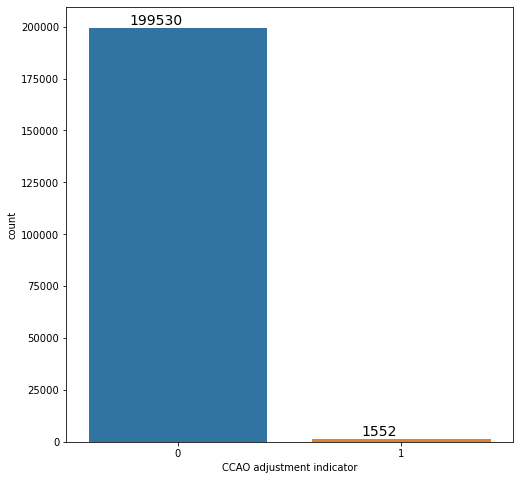

In [47]:
plt.figure(figsize=(8,8))        
g=sns.countplot(df['CCAO adjustment indicator'])
for p in g.patches:
    g.annotate('{:.0f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()),ha='center',va='bottom',color='black',fontsize=14)
plt.show()

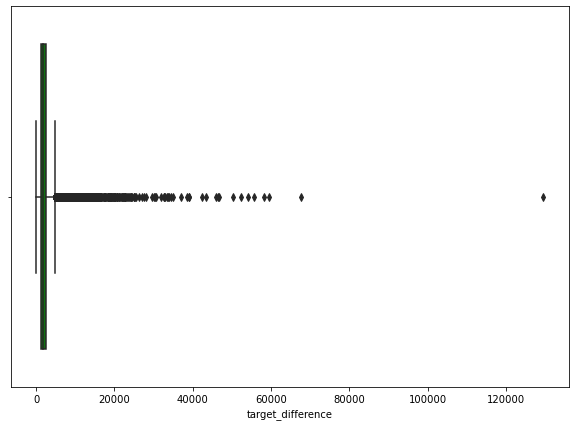

In [48]:
plt.figure(figsize=[10,7])
sns.boxplot(x=df.target_difference,orient='v',color='green')
plt.show()  

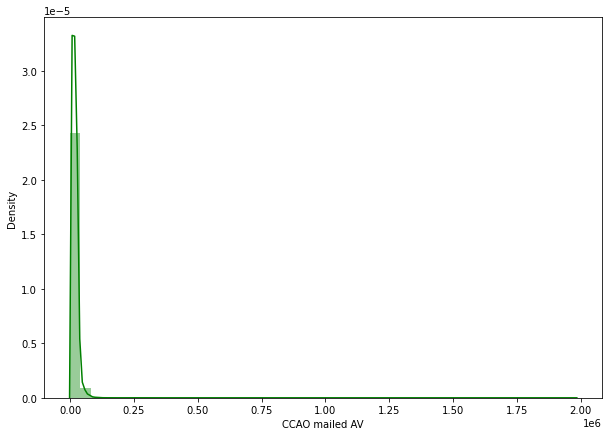

In [49]:
plt.figure(figsize=[10,7])
sns.distplot(df['CCAO mailed AV'],color='green')
plt.show()

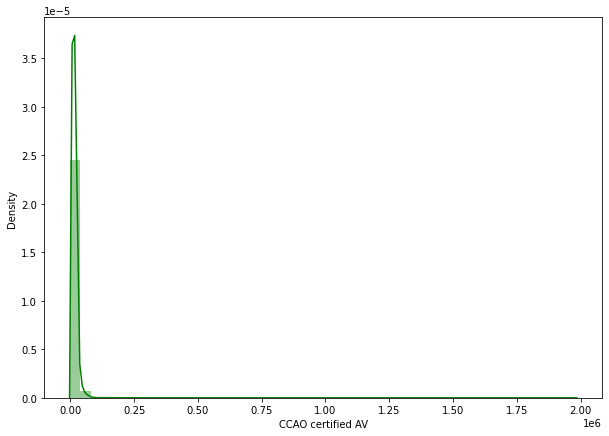

In [50]:
plt.figure(figsize=[10,7])
sns.distplot(df['CCAO certified AV'],color='green')
plt.show()

## Bivariate Analysis:

In [51]:
df_target=df[['CCAO certified AV','CCAO mailed AV','target_difference']]

<Figure size 1800x864 with 0 Axes>

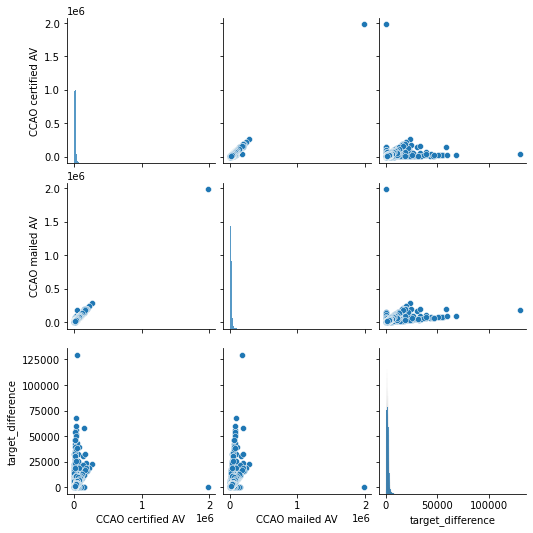

In [52]:
plt.figure(figsize=[25,12])
sns.pairplot(df_target)
plt.show()

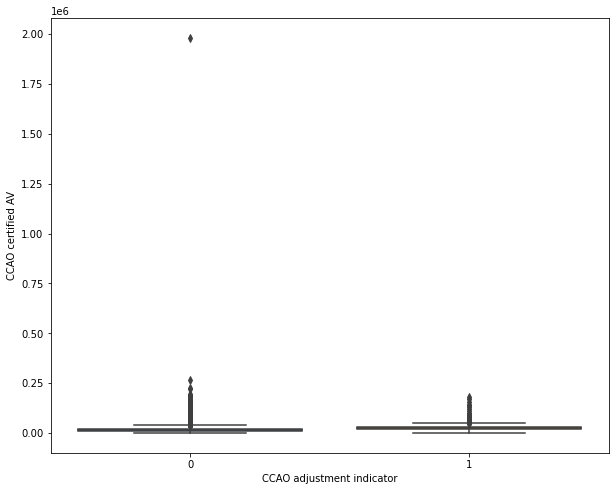

In [53]:
plt.figure(figsize=[10,8])
sns.boxplot(x='CCAO adjustment indicator',y='CCAO certified AV',data=df)
plt.show()

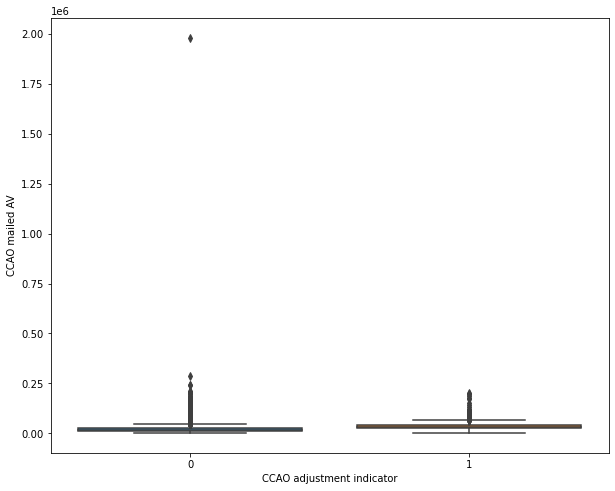

In [54]:
plt.figure(figsize=[10,8])
sns.boxplot(x='CCAO adjustment indicator',y='CCAO mailed AV',data=df)
plt.show()

## Multivariate Analysis:

### Correlation:

In [55]:
corr=pd.DataFrame((df.corrwith(df['CCAO adjustment indicator']).sort_values(ascending=False))*100).head(10)

In [56]:
corr.head()

,0
CCAO adjustment indicator,100.00
target_difference,36.40
CCAO mailed AV,11.19
Comm - Condominium,8.45
CCAO certified AV,7.82


<Figure size 2160x2160 with 0 Axes>

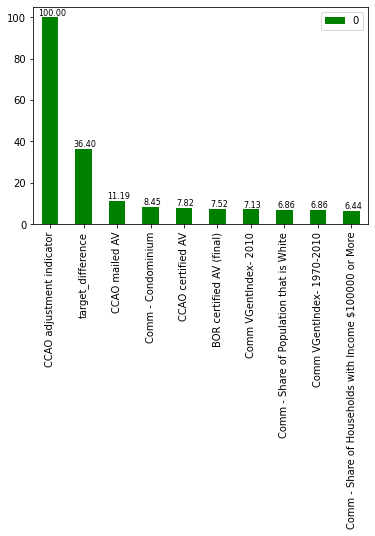

In [57]:
plt.figure(figsize=[30,30])
g=corr.plot(kind='bar',color='green')
for p in g.patches:
    g.annotate('{:.2f}'.format(p.get_height()),(p.get_x()+0.3,p.get_height()),ha='center',va='bottom',color='black',fontsize=8)
plt.show()

## Linear Regression:

## Scaling and  Splitting Train-test data:

In [58]:
scaler=MinMaxScaler()

In [59]:
#Dividing the data into train and test data using train_test_split from sklearn
np.random.seed(0)
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)

In [60]:
df_train.head()

,area_num_1,censustrac,chicagowar,commission,community,congressio,politicalt,staterepre,statesenat,Class,Township name,Township,CCAO Neighborhood,Tax code,CCAO mailed AV,CCAO certified AV,BOR certified AV (final),CCAO adjustment indicator,Property Class,Township Code2,Neighborhood Code,Township Neighborhood Only,Land Square Feet,Age,Wall Material,Rooms,Bedrooms,Basement,Basement Finish,Central Heating,Central Air Conditioning,Attic Type,Full Baths,Half Baths,Garage 1 Size,Garage 1 Material,Building Square Feet,Type of Residence,Property Zip Code,Flood Risk Factor,Flood Risk Direction,Elementary/Middle School District,High School District,Tax Rate,Tract Median Income,CommsortIndex,Community Area,Comm VGentIndex- 1970,Comm VGentIndex- 1980,Comm VGentIndex- 1990,Comm VGentIndex- 2000,Comm VGentIndex- 2010,Comm VGentIndex- 1970-2010,Comm - Single Family,Comm - Condominium,Comm - Building with 2-4 Units,Comm - Building with 5+ Units,Comm - Cost-Burdened Owner-Occupied Households,Comm - Cost-Burdened Renter-Occupied Household,Comm - Share of All Households Cost-Burdened,Comm - Share of Households that are Owner-Occupied,Comm - Share of Households that are Renter-Occupied,Comm - Total Households,Comm - Share of Population that is under the Poverty Level,Comm - Share of Households with Income Less than $25000,Comm - Share of Households with Income $25000 to $50000,Comm - Share of Households with Income $50000 to $100000,Comm - Share of Households with Income $100000 or More,Comm - Total Households_[0],Comm - Share of Population that is White,Comm - Share of Population that is African American,Comm - Share of Population that is Hispanic or Latino,Comm - Share of Population that is Asian,Comm - Share of Population that is Some Other Race,Comm - Share of Population Aged under 18,Comm - Share of Population Aged 18 to 44,Comm - Share of Population Aged 45 to 64,Comm - Share of Population Aged over 65,Comm - Total Population,target_difference
201023,53,17031530200,34,5,72,1,4,28,14,203,2,72,330,72003,6265,5701,5701,0,203,72,72330,330,3625,94,0,4,3,3,2,3,1,1,1,0,1.00,0,1170,1.00,10765,1,0,135,9,6.91,36448,74,72,5,-5,-3,-7,-9,-14,0.71,0.01,0.21,0.07,0.33,0.64,0.43,0.64,0.36,9129,0.23,0.30,0.26,0.26,0.18,9129,0.01,0.92,0.06,0.00,0.02,0.25,0.35,0.25,0.16,27028,564
149080,11,17031110400,45,12,35,5,0,19,10,203,1,71,402,71033,30081,27072,27072,0,203,71,71402,402,3720,96,2,6,3,1,2,1,1,0,1,0,2.00,0,1266,1.00,13078,1,0,267,43,6.89,69736,36,35,8,7,7,7,7,-1,0.48,0.09,0.32,0.11,0.33,0.42,0.36,0.66,0.34,10381,0.10,0.16,0.17,0.31,0.36,10381,0.62,0.01,0.25,0.10,0.03,0.20,0.36,0.28,0.16,27503,3009
47461,65,17031650400,13,11,71,3,4,22,11,202,2,72,30,72014,16893,15034,15034,0,202,72,72030,30,3750,68,2,5,3,1,1,3,1,0,1,1,2.00,2,943,1.00,12242,1,0,165,2,6.93,48634,73,71,5,7,7,1,-3,-8,0.70,0.07,0.17,0.06,0.32,0.61,0.40,0.71,0.29,9272,0.14,0.19,0.26,0.32,0.23,9272,0.13,0.03,0.84,0.00,0.00,0.28,0.40,0.21,0.10,31886,1859
57560,11,17031110501,45,10,35,5,0,19,10,203,1,71,10,71033,31486,28337,28337,0,203,71,71010,10,3090,79,2,7,4,1,2,3,1,0,1,1,2.00,0,1440,1.50,12932,1,0,109,43,6.89,86512,36,35,8,7,7,7,7,-1,0.48,0.09,0.32,0.11,0.33,0.42,0.36,0.66,0.34,10381,0.10,0.16,0.17,0.31,0.36,10381,0.62,0.01,0.25,0.10,0.03,0.20,0.36,0.28,0.16,27503,3149
185374,10,17031100200,41,9,53,5,0,20,10,203,1,71,410,71001,36249,32624,32624,0,203,71,71410,410,3750,94,2,7,4,1,2,3,0,2,1,1,1.00,0,1432,1.50,13835,1,0,241,43,6.89,74201,55,53,9,9,9,8,7,-2,0.72,0.08,0.11,0.09,0.24,0.46,0.29,0.74,0.26,15020,0.07,0.15,0.14,0.29,0.42,15020,0.77,0.01,0.15,0.04,0.03,0.20,0.33,0.28,0.19,37924,3625


In [61]:
col=list(df_train.columns)
l1=['CCAO adjustment indicator','Central Air Conditioning','Flood Risk Factor','Flood Risk Direction']
col = [ele for ele in col if ele not in l1]

In [62]:
df_train[col]=scaler.fit_transform(df_train[col])

In [63]:
df_train.head()

,area_num_1,censustrac,chicagowar,commission,community,congressio,politicalt,staterepre,statesenat,Class,Township name,Township,CCAO Neighborhood,Tax code,CCAO mailed AV,CCAO certified AV,BOR certified AV (final),CCAO adjustment indicator,Property Class,Township Code2,Neighborhood Code,Township Neighborhood Only,Land Square Feet,Age,Wall Material,Rooms,Bedrooms,Basement,Basement Finish,Central Heating,Central Air Conditioning,Attic Type,Full Baths,Half Baths,Garage 1 Size,Garage 1 Material,Building Square Feet,Type of Residence,Property Zip Code,Flood Risk Factor,Flood Risk Direction,Elementary/Middle School District,High School District,Tax Rate,Tract Median Income,CommsortIndex,Community Area,Comm VGentIndex- 1970,Comm VGentIndex- 1980,Comm VGentIndex- 1990,Comm VGentIndex- 2000,Comm VGentIndex- 2010,Comm VGentIndex- 1970-2010,Comm - Single Family,Comm - Condominium,Comm - Building with 2-4 Units,Comm - Building with 5+ Units,Comm - Cost-Burdened Owner-Occupied Households,Comm - Cost-Burdened Renter-Occupied Household,Comm - Share of All Households Cost-Burdened,Comm - Share of Households that are Owner-Occupied,Comm - Share of Households that are Renter-Occupied,Comm - Total Households,Comm - Share of Population that is under the Poverty Level,Comm - Share of Households with Income Less than $25000,Comm - Share of Households with Income $25000 to $50000,Comm - Share of Households with Income $50000 to $100000,Comm - Share of Households with Income $100000 or More,Comm - Total Households_[0],Comm - Share of Population that is White,Comm - Share of Population that is African American,Comm - Share of Population that is Hispanic or Latino,Comm - Share of Population that is Asian,Comm - Share of Population that is Some Other Race,Comm - Share of Population Aged under 18,Comm - Share of Population Aged 18 to 44,Comm - Share of Population Aged 45 to 64,Comm - Share of Population Aged over 65,Comm - Total Population,target_difference
201023,0.68,0.62,0.67,0.27,0.96,0.00,0.57,0.35,0.34,0.00,0.29,0.29,0.54,0.28,0.00,0.00,0.00,0,0.50,0.29,0.32,0.54,0.02,0.46,0.00,0.18,0.30,1.00,1.00,1.00,1,0.50,0.20,0.00,0.25,0.00,0.14,0.00,0.37,1,0,0.39,0.20,0.07,0.16,0.96,0.96,0.73,0.27,0.36,0.18,0.08,0.05,0.81,0.01,0.29,0.09,0.47,0.73,0.56,0.68,0.32,0.15,0.39,0.40,0.70,0.67,0.24,0.15,0.00,0.95,0.06,0.00,0.37,0.51,0.19,0.59,0.50,0.25,0.00
149080,0.13,0.12,0.90,0.73,0.47,0.50,0.00,0.23,0.24,0.00,0.14,0.14,0.66,0.14,0.01,0.01,0.01,0,0.50,0.14,0.19,0.66,0.02,0.47,0.67,0.27,0.30,0.33,1.00,0.33,1,0.00,0.20,0.00,0.50,0.00,0.15,0.00,0.45,1,0,0.77,0.93,0.06,0.35,0.46,0.47,0.86,0.82,0.82,0.82,0.75,0.38,0.54,0.14,0.45,0.14,0.45,0.32,0.37,0.70,0.30,0.17,0.12,0.13,0.36,0.83,0.58,0.17,0.74,0.01,0.27,0.13,0.50,0.38,0.22,0.75,0.51,0.26,0.02
47461,0.84,0.77,0.24,0.67,0.95,0.25,0.57,0.27,0.26,0.00,0.29,0.29,0.03,0.28,0.01,0.01,0.01,0,0.00,0.29,0.28,0.03,0.02,0.33,0.67,0.23,0.30,0.33,0.50,1.00,1,0.00,0.20,0.12,0.50,0.67,0.11,0.00,0.42,1,0,0.48,0.04,0.08,0.23,0.95,0.95,0.73,0.82,0.82,0.55,0.33,0.21,0.81,0.11,0.23,0.06,0.45,0.67,0.48,0.77,0.23,0.15,0.20,0.20,0.72,0.86,0.33,0.15,0.15,0.02,0.92,0.01,0.06,0.62,0.33,0.39,0.25,0.30,0.01
57560,0.13,0.12,0.90,0.60,0.47,0.50,0.00,0.23,0.24,0.00,0.14,0.14,0.00,0.14,0.02,0.01,0.01,0,0.50,0.14,0.14,0.00,0.02,0.38,0.67,0.32,0.40,0.33,1.00,1.00,1,0.00,0.20,0.12,0.50,0.00,0.17,0.25,0.44,1,0,0.32,0.93,0.06,0.45,0.46,0.47,0.86,0.82,0.82,0.82,0.75,0.38,0.54,0.14,0.45,0.14,0.45,0.32,0.37,0.70,0.30,0.17,0.12,0.13,0.36,0.83,0.58,0.17,0.74,0.01,0.27,0.13,0.50,0.38,0.22,0.75,0.51,0.26,0.02
185374,0.12,0.11,0.82,0.53,0.71,0.50,0.00,0.25,0.24,0.00,0.14,0.14,0.68,0.14,0.02,0.02,0.02,0,0.50,0.14,0.20,0.68,0.02,0.46,0.67,0.32,0.40,0.33,1.00,1.00,0,1.00,0.20,0.12,0.25,0.00,0.17,0.25,0.47,1,0,0.70,0.93,0.06,0.38,0.71,0.71,0.91,0.91,0.91,0.86,0.75,0.36,0.82,0.12,0.15,0.11,0.19,0.39,0.22,0.81,0.19,0.25,0.07,0.12,0.25,0.74,0.68,0.25,0.93,0.00,0.16,0.06,0.50,0.36,0.14,0.79,0.66,0.36,0.03


In [64]:
# We are not supposed to fit the test dataset because model can learn from it and it can affect the model result.
# So we only transform the test data set based on train set fit..
df_test[col]=scaler.transform(df_test[col])

In [65]:
df_test.head()

,area_num_1,censustrac,chicagowar,commission,community,congressio,politicalt,staterepre,statesenat,Class,Township name,Township,CCAO Neighborhood,Tax code,CCAO mailed AV,CCAO certified AV,BOR certified AV (final),CCAO adjustment indicator,Property Class,Township Code2,Neighborhood Code,Township Neighborhood Only,Land Square Feet,Age,Wall Material,Rooms,Bedrooms,Basement,Basement Finish,Central Heating,Central Air Conditioning,Attic Type,Full Baths,Half Baths,Garage 1 Size,Garage 1 Material,Building Square Feet,Type of Residence,Property Zip Code,Flood Risk Factor,Flood Risk Direction,Elementary/Middle School District,High School District,Tax Rate,Tract Median Income,CommsortIndex,Community Area,Comm VGentIndex- 1970,Comm VGentIndex- 1980,Comm VGentIndex- 1990,Comm VGentIndex- 2000,Comm VGentIndex- 2010,Comm VGentIndex- 1970-2010,Comm - Single Family,Comm - Condominium,Comm - Building with 2-4 Units,Comm - Building with 5+ Units,Comm - Cost-Burdened Owner-Occupied Households,Comm - Cost-Burdened Renter-Occupied Household,Comm - Share of All Households Cost-Burdened,Comm - Share of Households that are Owner-Occupied,Comm - Share of Households that are Renter-Occupied,Comm - Total Households,Comm - Share of Population that is under the Poverty Level,Comm - Share of Households with Income Less than $25000,Comm - Share of Households with Income $25000 to $50000,Comm - Share of Households with Income $50000 to $100000,Comm - Share of Households with Income $100000 or More,Comm - Total Households_[0],Comm - Share of Population that is White,Comm - Share of Population that is African American,Comm - Share of Population that is Hispanic or Latino,Comm - Share of Population that is Asian,Comm - Share of Population that is Some Other Race,Comm - Share of Population Aged under 18,Comm - Share of Population Aged 18 to 44,Comm - Share of Population Aged 45 to 64,Comm - Share of Population Aged over 65,Comm - Total Population,target_difference
6621,0.12,0.11,0.82,0.53,0.71,0.50,0.00,0.25,0.24,0.00,0.14,0.14,0.68,0.14,0.02,0.02,0.02,0,0.50,0.14,0.20,0.68,0.05,0.47,0.67,0.36,0.50,0.33,1.00,0.33,1,0.00,0.40,0.12,0.50,0.00,0.15,0.00,0.48,1,0,0.70,0.93,0.06,0.38,0.71,0.71,0.91,0.91,0.91,0.86,0.75,0.36,0.82,0.12,0.15,0.11,0.19,0.39,0.22,0.81,0.19,0.25,0.07,0.12,0.25,0.74,0.68,0.25,0.93,0.00,0.16,0.06,0.50,0.36,0.14,0.79,0.66,0.36,0.03
52326,0.87,0.79,0.33,0.07,0.92,0.00,0.57,0.39,0.39,0.00,0.29,0.29,0.27,0.28,0.00,0.00,0.00,0,0.50,0.29,0.30,0.27,0.02,0.53,0.00,0.23,0.30,0.33,1.00,0.33,1,0.00,0.20,0.00,0.50,0.00,0.13,0.00,0.60,1,0,0.97,0.30,0.06,0.25,0.92,0.92,0.18,0.18,0.18,0.18,0.08,0.36,0.54,0.00,0.58,0.13,0.48,0.80,0.74,0.45,0.55,0.15,0.59,0.71,0.75,0.42,0.05,0.15,0.01,0.91,0.10,0.00,0.25,0.46,0.10,0.61,0.70,0.24,0.01
162864,0.68,0.62,0.67,0.27,0.96,0.00,0.57,0.34,0.34,0.00,0.29,0.29,0.57,0.31,0.00,0.00,0.00,0,0.00,0.29,0.33,0.57,0.03,0.31,0.67,0.23,0.20,1.00,1.00,1.00,1,0.00,0.20,0.00,0.00,0.00,0.10,0.00,0.76,1,0,0.98,0.20,0.07,0.29,0.96,0.96,0.73,0.27,0.36,0.18,0.08,0.05,0.81,0.01,0.29,0.09,0.47,0.73,0.56,0.68,0.32,0.15,0.39,0.40,0.70,0.67,0.24,0.15,0.00,0.95,0.06,0.00,0.37,0.51,0.19,0.59,0.50,0.25,0.01
140761,0.63,0.58,0.16,0.27,0.80,0.12,0.43,0.35,0.34,0.00,0.00,0.00,0.36,0.00,0.01,0.01,0.01,0,0.50,0.00,0.03,0.36,0.02,0.29,0.67,0.27,0.30,0.33,1.00,1.00,0,0.50,0.20,0.00,0.50,0.00,0.14,0.00,0.35,1,0,0.22,0.13,0.07,0.21,0.80,0.80,0.45,0.36,0.36,0.18,0.08,0.21,0.72,0.00,0.30,0.20,0.52,0.65,0.61,0.55,0.45,0.23,0.40,0.45,0.69,0.70,0.19,0.23,0.01,0.99,0.01,0.01,0.35,0.45,0.14,0.69,0.60,0.37,0.01
131260,0.88,0.80,0.10,0.07,0.31,0.00,0.57,0.40,0.39,0.00,0.29,0.29,0.27,0.30,0.00,0.00,0.00,0,0.00,0.29,0.30,0.27,0.02,0.62,0.00,0.23,0.20,0.33,0.50,1.00,1,0.50,0.20,0.12,0.50,0.00,0.09,0.00,0.25,5,0,0.45,0.78,0.06,0.10,0.30,0.31,0.09,0.09,0.09,0.00,0.00,0.36,0.20,0.00,0.68,0.45,0.75,0.73,0.90,0.20,0.80,0.14,0.76,0.86,0.68,0.32,0.00,0.14,0.00,0.98,0.04,0.00,0.15,0.57,0.17,0.59,0.43,0.21,0.01


In [66]:
X_train = df_train.drop(['CCAO certified AV','CCAO mailed AV','target_difference'],axis=1)
y_train = df_train.target_difference
X_test = df_test.drop(['CCAO certified AV','CCAO mailed AV','target_difference'],axis=1)
y_test = df_test.target_difference   

In [67]:
X_train.head()

,area_num_1,censustrac,chicagowar,commission,community,congressio,politicalt,staterepre,statesenat,Class,Township name,Township,CCAO Neighborhood,Tax code,BOR certified AV (final),CCAO adjustment indicator,Property Class,Township Code2,Neighborhood Code,Township Neighborhood Only,Land Square Feet,Age,Wall Material,Rooms,Bedrooms,Basement,Basement Finish,Central Heating,Central Air Conditioning,Attic Type,Full Baths,Half Baths,Garage 1 Size,Garage 1 Material,Building Square Feet,Type of Residence,Property Zip Code,Flood Risk Factor,Flood Risk Direction,Elementary/Middle School District,High School District,Tax Rate,Tract Median Income,CommsortIndex,Community Area,Comm VGentIndex- 1970,Comm VGentIndex- 1980,Comm VGentIndex- 1990,Comm VGentIndex- 2000,Comm VGentIndex- 2010,Comm VGentIndex- 1970-2010,Comm - Single Family,Comm - Condominium,Comm - Building with 2-4 Units,Comm - Building with 5+ Units,Comm - Cost-Burdened Owner-Occupied Households,Comm - Cost-Burdened Renter-Occupied Household,Comm - Share of All Households Cost-Burdened,Comm - Share of Households that are Owner-Occupied,Comm - Share of Households that are Renter-Occupied,Comm - Total Households,Comm - Share of Population that is under the Poverty Level,Comm - Share of Households with Income Less than $25000,Comm - Share of Households with Income $25000 to $50000,Comm - Share of Households with Income $50000 to $100000,Comm - Share of Households with Income $100000 or More,Comm - Total Households_[0],Comm - Share of Population that is White,Comm - Share of Population that is African American,Comm - Share of Population that is Hispanic or Latino,Comm - Share of Population that is Asian,Comm - Share of Population that is Some Other Race,Comm - Share of Population Aged under 18,Comm - Share of Population Aged 18 to 44,Comm - Share of Population Aged 45 to 64,Comm - Share of Population Aged over 65,Comm - Total Population
201023,0.68,0.62,0.67,0.27,0.96,0.00,0.57,0.35,0.34,0.00,0.29,0.29,0.54,0.28,0.00,0,0.50,0.29,0.32,0.54,0.02,0.46,0.00,0.18,0.30,1.00,1.00,1.00,1,0.50,0.20,0.00,0.25,0.00,0.14,0.00,0.37,1,0,0.39,0.20,0.07,0.16,0.96,0.96,0.73,0.27,0.36,0.18,0.08,0.05,0.81,0.01,0.29,0.09,0.47,0.73,0.56,0.68,0.32,0.15,0.39,0.40,0.70,0.67,0.24,0.15,0.00,0.95,0.06,0.00,0.37,0.51,0.19,0.59,0.50,0.25
149080,0.13,0.12,0.90,0.73,0.47,0.50,0.00,0.23,0.24,0.00,0.14,0.14,0.66,0.14,0.01,0,0.50,0.14,0.19,0.66,0.02,0.47,0.67,0.27,0.30,0.33,1.00,0.33,1,0.00,0.20,0.00,0.50,0.00,0.15,0.00,0.45,1,0,0.77,0.93,0.06,0.35,0.46,0.47,0.86,0.82,0.82,0.82,0.75,0.38,0.54,0.14,0.45,0.14,0.45,0.32,0.37,0.70,0.30,0.17,0.12,0.13,0.36,0.83,0.58,0.17,0.74,0.01,0.27,0.13,0.50,0.38,0.22,0.75,0.51,0.26
47461,0.84,0.77,0.24,0.67,0.95,0.25,0.57,0.27,0.26,0.00,0.29,0.29,0.03,0.28,0.01,0,0.00,0.29,0.28,0.03,0.02,0.33,0.67,0.23,0.30,0.33,0.50,1.00,1,0.00,0.20,0.12,0.50,0.67,0.11,0.00,0.42,1,0,0.48,0.04,0.08,0.23,0.95,0.95,0.73,0.82,0.82,0.55,0.33,0.21,0.81,0.11,0.23,0.06,0.45,0.67,0.48,0.77,0.23,0.15,0.20,0.20,0.72,0.86,0.33,0.15,0.15,0.02,0.92,0.01,0.06,0.62,0.33,0.39,0.25,0.30
57560,0.13,0.12,0.90,0.60,0.47,0.50,0.00,0.23,0.24,0.00,0.14,0.14,0.00,0.14,0.01,0,0.50,0.14,0.14,0.00,0.02,0.38,0.67,0.32,0.40,0.33,1.00,1.00,1,0.00,0.20,0.12,0.50,0.00,0.17,0.25,0.44,1,0,0.32,0.93,0.06,0.45,0.46,0.47,0.86,0.82,0.82,0.82,0.75,0.38,0.54,0.14,0.45,0.14,0.45,0.32,0.37,0.70,0.30,0.17,0.12,0.13,0.36,0.83,0.58,0.17,0.74,0.01,0.27,0.13,0.50,0.38,0.22,0.75,0.51,0.26
185374,0.12,0.11,0.82,0.53,0.71,0.50,0.00,0.25,0.24,0.00,0.14,0.14,0.68,0.14,0.02,0,0.50,0.14,0.20,0.68,0.02,0.46,0.67,0.32,0.40,0.33,1.00,1.00,0,1.00,0.20,0.12,0.25,0.00,0.17,0.25,0.47,1,0,0.70,0.93,0.06,0.38,0.71,0.71,0.91,0.91,0.91,0.86,0.75,0.36,0.82,0.12,0.15,0.11,0.19,0.39,0.22,0.81,0.19,0.25,0.07,0.12,0.25,0.74,0.68,0.25,0.93,0.00,0.16,0.06,0.50,0.36,0.14,0.79,0.66,0.36


In [68]:
y_train.head()

201023   0.00
149080   0.02
47461    0.01
57560    0.02
185374   0.03
Name: target_difference, dtype: float64

In [69]:
X_test.head()

,area_num_1,censustrac,chicagowar,commission,community,congressio,politicalt,staterepre,statesenat,Class,Township name,Township,CCAO Neighborhood,Tax code,BOR certified AV (final),CCAO adjustment indicator,Property Class,Township Code2,Neighborhood Code,Township Neighborhood Only,Land Square Feet,Age,Wall Material,Rooms,Bedrooms,Basement,Basement Finish,Central Heating,Central Air Conditioning,Attic Type,Full Baths,Half Baths,Garage 1 Size,Garage 1 Material,Building Square Feet,Type of Residence,Property Zip Code,Flood Risk Factor,Flood Risk Direction,Elementary/Middle School District,High School District,Tax Rate,Tract Median Income,CommsortIndex,Community Area,Comm VGentIndex- 1970,Comm VGentIndex- 1980,Comm VGentIndex- 1990,Comm VGentIndex- 2000,Comm VGentIndex- 2010,Comm VGentIndex- 1970-2010,Comm - Single Family,Comm - Condominium,Comm - Building with 2-4 Units,Comm - Building with 5+ Units,Comm - Cost-Burdened Owner-Occupied Households,Comm - Cost-Burdened Renter-Occupied Household,Comm - Share of All Households Cost-Burdened,Comm - Share of Households that are Owner-Occupied,Comm - Share of Households that are Renter-Occupied,Comm - Total Households,Comm - Share of Population that is under the Poverty Level,Comm - Share of Households with Income Less than $25000,Comm - Share of Households with Income $25000 to $50000,Comm - Share of Households with Income $50000 to $100000,Comm - Share of Households with Income $100000 or More,Comm - Total Households_[0],Comm - Share of Population that is White,Comm - Share of Population that is African American,Comm - Share of Population that is Hispanic or Latino,Comm - Share of Population that is Asian,Comm - Share of Population that is Some Other Race,Comm - Share of Population Aged under 18,Comm - Share of Population Aged 18 to 44,Comm - Share of Population Aged 45 to 64,Comm - Share of Population Aged over 65,Comm - Total Population
6621,0.12,0.11,0.82,0.53,0.71,0.50,0.00,0.25,0.24,0.00,0.14,0.14,0.68,0.14,0.02,0,0.50,0.14,0.20,0.68,0.05,0.47,0.67,0.36,0.50,0.33,1.00,0.33,1,0.00,0.40,0.12,0.50,0.00,0.15,0.00,0.48,1,0,0.70,0.93,0.06,0.38,0.71,0.71,0.91,0.91,0.91,0.86,0.75,0.36,0.82,0.12,0.15,0.11,0.19,0.39,0.22,0.81,0.19,0.25,0.07,0.12,0.25,0.74,0.68,0.25,0.93,0.00,0.16,0.06,0.50,0.36,0.14,0.79,0.66,0.36
52326,0.87,0.79,0.33,0.07,0.92,0.00,0.57,0.39,0.39,0.00,0.29,0.29,0.27,0.28,0.00,0,0.50,0.29,0.30,0.27,0.02,0.53,0.00,0.23,0.30,0.33,1.00,0.33,1,0.00,0.20,0.00,0.50,0.00,0.13,0.00,0.60,1,0,0.97,0.30,0.06,0.25,0.92,0.92,0.18,0.18,0.18,0.18,0.08,0.36,0.54,0.00,0.58,0.13,0.48,0.80,0.74,0.45,0.55,0.15,0.59,0.71,0.75,0.42,0.05,0.15,0.01,0.91,0.10,0.00,0.25,0.46,0.10,0.61,0.70,0.24
162864,0.68,0.62,0.67,0.27,0.96,0.00,0.57,0.34,0.34,0.00,0.29,0.29,0.57,0.31,0.00,0,0.00,0.29,0.33,0.57,0.03,0.31,0.67,0.23,0.20,1.00,1.00,1.00,1,0.00,0.20,0.00,0.00,0.00,0.10,0.00,0.76,1,0,0.98,0.20,0.07,0.29,0.96,0.96,0.73,0.27,0.36,0.18,0.08,0.05,0.81,0.01,0.29,0.09,0.47,0.73,0.56,0.68,0.32,0.15,0.39,0.40,0.70,0.67,0.24,0.15,0.00,0.95,0.06,0.00,0.37,0.51,0.19,0.59,0.50,0.25
140761,0.63,0.58,0.16,0.27,0.80,0.12,0.43,0.35,0.34,0.00,0.00,0.00,0.36,0.00,0.01,0,0.50,0.00,0.03,0.36,0.02,0.29,0.67,0.27,0.30,0.33,1.00,1.00,0,0.50,0.20,0.00,0.50,0.00,0.14,0.00,0.35,1,0,0.22,0.13,0.07,0.21,0.80,0.80,0.45,0.36,0.36,0.18,0.08,0.21,0.72,0.00,0.30,0.20,0.52,0.65,0.61,0.55,0.45,0.23,0.40,0.45,0.69,0.70,0.19,0.23,0.01,0.99,0.01,0.01,0.35,0.45,0.14,0.69,0.60,0.37
131260,0.88,0.80,0.10,0.07,0.31,0.00,0.57,0.40,0.39,0.00,0.29,0.29,0.27,0.30,0.00,0,0.00,0.29,0.30,0.27,0.02,0.62,0.00,0.23,0.20,0.33,0.50,1.00,1,0.50,0.20,0.12,0.50,0.00,0.09,0.00,0.25,5,0,0.45,0.78,0.06,0.10,0.30,0.31,0.09,0.09,0.09,0.00,0.00,0.36,0.20,0.00,0.68,0.45,0.75,0.73,0.90,0.20,0.80,0.14,0.76,0.86,0.68,0.32,0.00,0.14,0.00,0.98,0.04,0.00,0.15,0.57,0.17,0.59,0.43,0.21


In [70]:
y_test.head()

6621     0.03
52326    0.01
162864   0.01
140761   0.01
131260   0.01
Name: target_difference, dtype: float64

# Regression Models:

## Linear Regression:

In [71]:
X_train_sm=sm.add_constant(X_train)

In [72]:
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()

In [73]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      target_difference   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     4726.
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        14:53:27   Log-Likelihood:             5.2716e+05
No. Observations:              140757   AIC:                        -1.054e+06
Df Residuals:                  140686   BIC:                        -1.053e+06
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                         -0.5118      0.053     -9.594      0.000      -0.616      -0.407
area_num_1                                                    -0.0024      0.000    -13.587      0.000      -0.003      -0.002
censustrac                                                    -0.0003      0.000     -3.050      0.002      -0.001      -0.000
chicagowar                                                    -0.0009      0.000     -6.033      0.000      -0.001      -0.001
commission                                                     0.0018      0.000     15.914      0.000       0.002       0.002
community                                                      0.5989      0.040     14.925      0.000       0.520       0.678
congressio                                                    -0.0004      0.000     -3.326      0.001      -0.001      -0.000
politicalt                                                    -0.0020      0.000     -9.705      0.000      -0.002      -0.002
staterepre                                                     0.0024      0.003      0.771      0.441      -0.004       0.009
statesenat                                                    -0.0021      0.003     -0.655      0.512      -0.008       0.004
Class                                                         -0.0026      0.001     -2.509      0.012      -0.005      -0.001
Township name                                                  0.0059      0.001      7.849      0.000       0.004       0.007
Township                                                       0.0059      0.001      7.849      0.000       0.004       0.007
CCAO Neighborhood                                             -0.0008   6.75e-05    -11.450      0.000      -0.001      -0.001
Tax code                                                      -0.0238      0.003     -7.881      0.000      -0.030      -0.018
BOR certified AV (final)                                       0.6456      0.005    124.251      0.000       0.635       0.656
CCAO adjustment indicator                                      0.0350      0.000    201.017      0.000       0.035       0.035
Property Class                                                -0.0003   9.61e-05     -2.672      0.008      -0.000   -6.84e-05
Township Code2                                                 0.0059      0.001      7.849      0.000       0.004       0.007
Neighborhood Code                                              0.0057      0.001      7.786      0.000       0.004       0.007
Township Neighborhood Only                                    -0.0008   6.75e-05    -11.450      0.000      -0.001      -0.001
Land Square Feet                   

### Test set:

In [74]:
X_test_sm=sm.add_constant(X_test)
y_pred=lr_model.predict(X_test_sm)

In [75]:
lm = sm.OLS(y_test,X_test_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:      target_difference   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     3225.
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        14:53:27   Log-Likelihood:             2.3755e+05
No. Observations:               60325   AIC:                        -4.750e+05
Df Residuals:                   60254   BIC:                        -4.743e+05
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

In [76]:
# Linear Regression model has as a r2 score of 70% on train dataset and 78% dataset..

In [77]:
Regression_1=pd.DataFrame(columns={'Model_name','R2 Score_test_dataset'})

In [78]:
Regression_1.loc[len(Regression_1.index)]=['Linear Regression',78.9]

In [79]:
Regression_1

,Model_name,R2 Score_test_dataset
0,Linear Regression,78.90


## Decision Tree Regressor:

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
dt = DecisionTreeRegressor(splitter='best', criterion='squared_error') 

In [81]:
dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [82]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [83]:
y_train_pred = dt.predict(X_train)
r2_score(y_train, y_train_pred)

0.9999999999826147

### Test dataset:

In [84]:
y_pred=dt.predict(X_test)

In [85]:
dt.score(X_test,y_test)

0.8316011180298191

In [86]:
# Decision tree model has as a r2 score of 99% on train dataset and 83% dataset which suggests that the model is overfitting.

In [87]:
Regression_1.loc[len(Regression_1.index)]=['Decision Tree Regressor',83]

In [88]:
Regression_1

,Model_name,R2 Score_test_dataset
0,Linear Regression,78.90
1,Decision Tree Regressor,83.00


### Random Forest Regressor:

In [89]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor (n_estimators =100) 

In [90]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [91]:
rf.fit(X_train, y_train)

RandomForestRegressor()

In [92]:
rf.score(X_train, y_train)

0.9744475393837033

### Test dataset:

In [93]:
y_pred=rf.predict(X_test)

In [94]:
r2_score(y_test, y_pred)

0.9238253937031735

In [95]:
Regression_1.loc[len(Regression_1.index)]=['Random Forest Regressor',92]

In [96]:
# Random Forest model has as a r2 score of 97% on train dataset and 92% dataset which suggests that the model is well balanced.

In [97]:
Regression_1

,Model_name,R2 Score_test_dataset
0,Linear Regression,78.90
1,Decision Tree Regressor,83.00
2,Random Forest Regressor,92.00


## Bagging Regressor:

In [98]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(n_estimators =100) 

In [99]:
br.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [100]:
br.fit(X_train, y_train)

BaggingRegressor(n_estimators=100)

In [101]:
br.score(X_train, y_train)

0.9763613236327738

## Test dataset predictions:

In [102]:
y_pred=br.predict(X_test)

In [103]:
r2_score(y_test, y_pred)

0.9232137271665684

In [104]:
# Bagging regressor model has as a 97% r2 score on train and 92% on test dataset which suggests that the model is consistent..

In [105]:
Regression_1.loc[len(Regression_1.index)]=['Bagging Regressor',92]

In [106]:
Regression_1

,Model_name,R2 Score_test_dataset
0,Linear Regression,78.90
1,Decision Tree Regressor,83.00
2,Random Forest Regressor,92.00
3,Bagging Regressor,92.00


Overall, After comparing the four models based on their performance on both train and test data sets, we can say that the random forest model is well balanced and performed consistently on both train and test datasets.

#  Classification Algorithms:

In [107]:
df_train.shape

(140757, 80)

In [108]:
df_test.shape

(60325, 80)

In [109]:
X_train = df_train.drop(['CCAO adjustment indicator'],axis=1)
y_train = df_train['CCAO adjustment indicator']
X_test = df_test.drop(['CCAO adjustment indicator'],axis=1)
y_test = df_test['CCAO adjustment indicator']   

## Custom Functions:

In [110]:
#These are custom functions to be used to evaluate the classification models..

In [111]:
def draw_roc( actual, probs ):             # custom function for plotting a ROC Curve.
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [112]:
def evaluate_model(y,y_pred):   
    confusion_rm_f=confusion_matrix(y,y_pred)
    print(confusion_rm_f)
    TN = confusion_rm_f[0,0] 
    TP = confusion_rm_f[1,1] 
    FP = confusion_rm_f[0,1] 
    FN = confusion_rm_f[1,0] 
    total1=sum(sum(confusion_rm_f))
    print('accuracy: ' , ((confusion_rm_f[0,0]+confusion_rm_f[1,1])/total1)*100)
    print('Sensitivity: ', (TP / float(TP+FN))*100)
    print('Specificity: ',(TN / float(TN+FP))*100)
    print('false postive rate: ',(FP/ float(TN+FP))*100)
    print('Negative predictive value: ',(TN / float(TN+ FN))*100)
    print('Misclassification Rate: ',((FN+FP)/(TP+TN+FP+FN))*100)
    print("-"*50)
    print("-"*50)

## Logistic Regression:

In [113]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Generalized Linear Model Regression Results                     
=====================================================================================
Dep. Variable:     CCAO adjustment indicator   No. Observations:               140757
Model:                                   GLM   Df Residuals:                   140685
Model Family:                       Binomial   Df Model:                           71
Link Function:                         Logit   Scale:                          1.0000
Method:                                 IRLS   Log-Likelihood:                    nan
Date:                       Tue, 02 May 2023   Deviance:                       3213.5
Time:                               15:04:44   Pearson chi2:                 3.12e+15
No. Iterations:                          100   Pseudo R-squ. (CS):                nan
Covariance Type:                   nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                       -695.2998    264.949     -2.624      0.009   -1214.590    -176.010
area_num_1                                                    -1.3689      0.668     -2.050      0.040      -2.678      -0.060
censustrac                                                     0.5088      0.398      1.278      0.201      -0.271       1.289
chicagowar                                                     0.8744      0.644      1.358      0.175      -0.388       2.137
commission                                                     0.6708      0.508      1.321      0.186      -0.324       1.666
community                                                   -120.1830    189.718     -0.633      0.526    -492.023     251.657
congressio                                                     0.0533      0.516      0.103      0.918      -0.958       1.064
politicalt                                                     1.2959      0.836      1.550      0.121      -0.343       2.935
staterepre                                                   -24.0632     14.649     -1.643      0.100     -52.776       4.649
statesenat                                                    23.3248     14.678      1.589      0.112      -5.444      52.093
Class                                                        -26.7751      2.513    -10.654      0.000     -31.701     -21.849
Township name                                                  7.7557      3.580      2.166      0.030       0.739      14.773
Township                                                       7.7557      3.580      2.166      0.030       0.739      14.773
CCAO Neighborhood                                              0.2941      0.270      1.091      0.275      -0.234       0.822
Tax code                                                     -31.2808     14.440     -2.166      0.030     -59.582      -2.980
CCAO mailed AV                                              -238.3998     26.938     -8.850      0.000    -291.196    -185.603
CCAO certified AV                                           -280.6939     27.362    -10.258      0.000    -334.323    -227.065
BOR certified AV (final)                                    -708.0864     56.580    -12.515      0.000    -818.982    -597.191
Property Class                                                 1.0453      0.396      2.639      0.008       0.269       1.822
Township Code2                                                 7.7557      3.580      2.166      0.030       0.739      14.773
Neighborhood Code                                              7.6067      3.485     

In [114]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

201023   0.00
149080   0.00
47461    0.00
57560    0.00
185374   0.00
116640   0.00
143174   0.00
75610    0.00
43283    0.01
88479    0.00
dtype: float64

In [115]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()          # converting the above results as a dataframe.

,Churn,Churn_Prob
201023,0,0.00
149080,0,0.00
47461,0,0.00
57560,0,0.00
185374,0,0.00


In [116]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
201023,0,0.00,1,0,0,0,0,0,0,0,0,0
149080,0,0.00,1,0,0,0,0,0,0,0,0,0
47461,0,0.00,1,0,0,0,0,0,0,0,0,0
57560,0,0.00,1,0,0,0,0,0,0,0,0,0
185374,0,0.00,1,0,0,0,0,0,0,0,0,0


In [117]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)



      prob  accuracy  sensi  speci
0.00  0.00      0.01   1.00   0.00
0.10  0.10      1.00   0.86   1.00
0.20  0.20      1.00   0.83   1.00
0.30  0.30      1.00   0.80   1.00
0.40  0.40      1.00   0.78   1.00
0.50  0.50      1.00   0.76   1.00
0.60  0.60      1.00   0.74   1.00
0.70  0.70      1.00   0.71   1.00
0.80  0.80      1.00   0.69   1.00
0.90  0.90      1.00   0.65   1.00


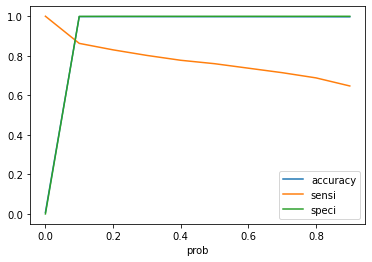

In [118]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [119]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)
y_train_pred_final.head()   

,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
201023,0,0.00,1,0,0,0,0,0,0,0,0,0,0
149080,0,0.00,1,0,0,0,0,0,0,0,0,0,0
47461,0,0.00,1,0,0,0,0,0,0,0,0,0,0
57560,0,0.00,1,0,0,0,0,0,0,0,0,0,0
185374,0,0.00,1,0,0,0,0,0,0,0,0,0,0


In [120]:
evaluate_model(y_train_pred_final['Churn'],y_train_pred_final['predicted'])

[[139544    113]
 [   151    949]]
accuracy:  99.8124427204331
Sensitivity:  86.27272727272727
Specificity:  99.9190874786083
false postive rate:  0.08091252139169537
Negative predictive value:  99.8919073696267
Misclassification Rate:  0.1875572795669132
--------------------------------------------------
--------------------------------------------------


### Test dataset predictions:

In [121]:
X_test_sm = sm.add_constant(X_test)  

y_test_pred = res.predict(X_test_sm)   # fitting the test data set to the model.

In [122]:
y_test_pred

6621     0.00
52326    0.00
162864   0.00
140761   0.00
131260   0.00
         ... 
35253    0.00
115016   0.00
73658    0.90
36395    0.00
127196   0.00
Length: 60325, dtype: float64

In [123]:
y_test_pred = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred.head()      

,Churn,Churn_Prob
6621,0,0.00
52326,0,0.00
162864,0,0.00
140761,0,0.00
131260,0,0.00


In [124]:
y_test_pred['predicted'] = y_test_pred.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)
y_test_pred.head()   

,Churn,Churn_Prob,predicted
6621,0,0.00,0
52326,0,0.00,0
162864,0,0.00,0
140761,0,0.00,0
131260,0,0.00,0


In [125]:
evaluate_model(y_test,y_test_pred['predicted'])

[[59837    36]
 [   64   388]]
accuracy:  99.83423124740986
Sensitivity:  85.84070796460178
Specificity:  99.93987273061313
false postive rate:  0.060127269386868874
Negative predictive value:  99.89315704245338
Misclassification Rate:  0.16576875259013676
--------------------------------------------------
--------------------------------------------------


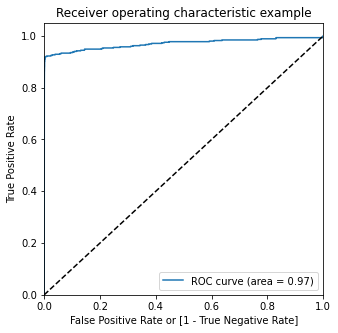

In [126]:
fpr, tpr, thresholds = metrics.roc_curve( y_test_pred.Churn, y_test_pred.Churn_Prob, drop_intermediate = False )

draw_roc(y_test_pred.Churn, y_test_pred.Churn_Prob)     # ROC Curve for test data set.

In [127]:
Classification=pd.DataFrame(columns={'Model_name','AUC-ROC Score_test'})

In [128]:
Classification.loc[len(Classification.index)]=['Logisitc Regression',97]

In [129]:
Classification

,Model_name,AUC-ROC Score_test
0,Logisitc Regression,97


After comparing the metrics derived from confusion matrix and ROC-AUC Curve, We can say that the logistic regression model is consistent on both train and test datasets and was able to classify minority class label correctly.

## Decison Tree Classifier:

In [130]:
dt = DecisionTreeClassifier(max_depth=5)    # simple decision tree model with out hyperparameter tuning
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [131]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [132]:
y_train_pred=dt.predict(X_train)

In [133]:
y_train_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [134]:
evaluate_model(y_train,y_train_pred)

[[139593     64]
 [   298    802]]
accuracy:  99.74281918483628
Sensitivity:  72.9090909090909
Specificity:  99.95417343921179
false postive rate:  0.04582656078821684
Negative predictive value:  99.78697700352417
Misclassification Rate:  0.2571808151637219
--------------------------------------------------
--------------------------------------------------


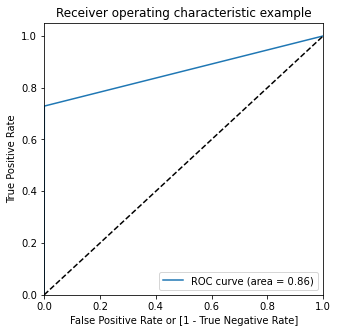

In [135]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_pred, drop_intermediate = False )

draw_roc(y_train,y_train_pred) 

## Test dataset predictions:

In [136]:
y_test_pred=dt.predict(X_test)

In [137]:
y_test_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [138]:
evaluate_model(y_test,y_test_pred)

[[59849    24]
 [  141   311]]
accuracy:  99.72648155822628
Sensitivity:  68.80530973451327
Specificity:  99.95991515374209
false postive rate:  0.04008484625791258
Negative predictive value:  99.76496082680447
Misclassification Rate:  0.27351844177372564
--------------------------------------------------
--------------------------------------------------


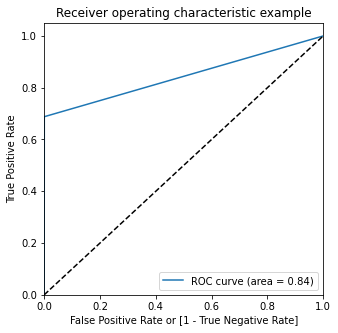

In [139]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_test_pred, drop_intermediate = False )

draw_roc(y_test, y_test_pred)     # ROC Curve for test data set.

In [140]:
Classification.loc[len(Classification.index)]=['Decision Tree Classifier',84]

In [141]:
Classification

,Model_name,AUC-ROC Score_test
0,Logisitc Regression,97
1,Decision Tree Classifier,84


Decison tree model has good accuracy rate but was not able to classify minority class labels perfectly on both train and test datasets.

## Random Forest Classifiers:

In [142]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1)     
# creating a random forest classifier object.

In [143]:
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [144]:
classifier_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [145]:
y_train_pred=classifier_rf.predict(X_train)

In [146]:
evaluate_model(y_train,y_train_pred)

[[139657      0]
 [     0   1100]]
accuracy:  100.0
Sensitivity:  100.0
Specificity:  100.0
false postive rate:  0.0
Negative predictive value:  100.0
Misclassification Rate:  0.0
--------------------------------------------------
--------------------------------------------------


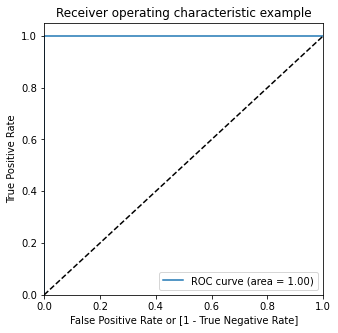

In [147]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_pred, drop_intermediate = False )

draw_roc(y_train,y_train_pred) 

### Test dataset predictions:

In [148]:
y_test_pred=classifier_rf.predict(X_test)

In [149]:
evaluate_model(y_test,y_test_pred)

[[59865     8]
 [  194   258]]
accuracy:  99.66514711976792
Sensitivity:  57.07964601769911
Specificity:  99.9866383845807
false postive rate:  0.013361615419304194
Negative predictive value:  99.67698429877288
Misclassification Rate:  0.33485288023207627
--------------------------------------------------
--------------------------------------------------


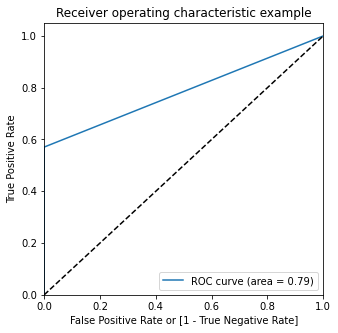

In [150]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_test_pred, drop_intermediate = False )

draw_roc(y_test, y_test_pred)     # ROC Curve for test data set.

In [151]:
Classification.loc[len(Classification.index)]=['Random Forest Classifier',79]

In [152]:
Classification

,Model_name,AUC-ROC Score_test
0,Logisitc Regression,97
1,Decision Tree Classifier,84
2,Random Forest Classifier,79


We can see that random forest algorithm has inconsistent performances across train and test datasets indicating that the model is overfitting.

## AdaBoost:

In [153]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators=50) 

In [154]:
adb.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [155]:
adb.fit(X_train,y_train)

AdaBoostClassifier()

In [156]:
y_train_pred=adb.predict(X_train)

In [157]:
evaluate_model(y_train,y_train_pred)

[[139619     38]
 [   507    593]]
accuracy:  99.61280788877285
Sensitivity:  53.90909090909091
Specificity:  99.972790479532
false postive rate:  0.027209520468003755
Negative predictive value:  99.63818277835662
Misclassification Rate:  0.3871921112271503
--------------------------------------------------
--------------------------------------------------


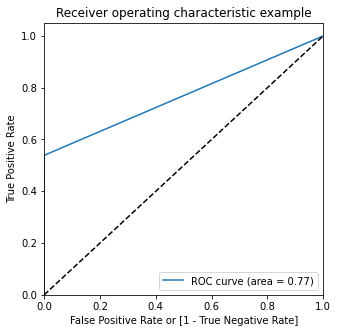

In [158]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,y_train_pred, drop_intermediate = False )

draw_roc(y_train,y_train_pred) 

### Test dataset Predictions:

In [159]:
y_test_pred=adb.predict(X_test)

In [160]:
evaluate_model(y_test,y_test_pred)

[[59864     9]
 [  208   244]]
accuracy:  99.6402818068794
Sensitivity:  53.98230088495575
Specificity:  99.98496818265328
false postive rate:  0.015031817346717219
Negative predictive value:  99.65374883473166
Misclassification Rate:  0.3597181931205968
--------------------------------------------------
--------------------------------------------------


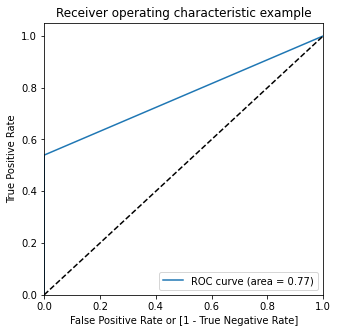

In [161]:
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_test_pred, drop_intermediate = False )

draw_roc(y_test, y_test_pred)     # ROC Curve for test data set.

In [162]:
Classification.loc[len(Classification.index)]=['AdBoost Classifier',77]

In [163]:
Classification

,Model_name,AUC-ROC Score_test
0,Logisitc Regression,97
1,Decision Tree Classifier,84
2,Random Forest Classifier,79
3,AdBoost Classifier,77


AdaBoost model has good accuracy rate but was not able to classify minority class labels perfectly on both train and test datasets.

# Taxrate prediction:

Here we will build a model to predict tax rates and then we will optimize the model to use a minimum number of features to give a accurate prediction of tax rate.

In [164]:
df.head()

,area_num_1,censustrac,chicagowar,commission,community,congressio,politicalt,staterepre,statesenat,Class,Township name,Township,CCAO Neighborhood,Tax code,CCAO mailed AV,CCAO certified AV,BOR certified AV (final),CCAO adjustment indicator,Property Class,Township Code2,Neighborhood Code,Township Neighborhood Only,Land Square Feet,Age,Wall Material,Rooms,Bedrooms,Basement,Basement Finish,Central Heating,Central Air Conditioning,Attic Type,Full Baths,Half Baths,Garage 1 Size,Garage 1 Material,Building Square Feet,Type of Residence,Property Zip Code,Flood Risk Factor,Flood Risk Direction,Elementary/Middle School District,High School District,Tax Rate,Tract Median Income,CommsortIndex,Community Area,Comm VGentIndex- 1970,Comm VGentIndex- 1980,Comm VGentIndex- 1990,Comm VGentIndex- 2000,Comm VGentIndex- 2010,Comm VGentIndex- 1970-2010,Comm - Single Family,Comm - Condominium,Comm - Building with 2-4 Units,Comm - Building with 5+ Units,Comm - Cost-Burdened Owner-Occupied Households,Comm - Cost-Burdened Renter-Occupied Household,Comm - Share of All Households Cost-Burdened,Comm - Share of Households that are Owner-Occupied,Comm - Share of Households that are Renter-Occupied,Comm - Total Households,Comm - Share of Population that is under the Poverty Level,Comm - Share of Households with Income Less than $25000,Comm - Share of Households with Income $25000 to $50000,Comm - Share of Households with Income $50000 to $100000,Comm - Share of Households with Income $100000 or More,Comm - Total Households_[0],Comm - Share of Population that is White,Comm - Share of Population that is African American,Comm - Share of Population that is Hispanic or Latino,Comm - Share of Population that is Asian,Comm - Share of Population that is Some Other Race,Comm - Share of Population Aged under 18,Comm - Share of Population Aged 18 to 44,Comm - Share of Population Aged 45 to 64,Comm - Share of Population Aged over 65,Comm - Total Population,target_difference
0,74,17031740400,19,11,45,3,4,35,18,203,2,72,422,72003,22701,20884,20884,0,203,72,72422,422,4950,66,0,4,3,3,2,3,1,1,1,0,1.00,0,1165,1.00,27492,1,0,53,31,6.91,85798,47,45,9,7,7,7,5,-4,0.86,0.04,0.03,0.07,0.17,0.32,0.19,0.86,0.14,6692,0.05,0.10,0.14,0.25,0.51,6692,0.83,0.04,0.10,0.02,0.01,0.24,0.35,0.28,0.12,19190,1817
1,74,17031740400,19,11,45,3,4,35,18,203,2,72,422,72003,22287,20504,20504,0,203,72,72422,422,4950,56,2,5,3,1,2,3,0,1,1,0,2.00,0,1136,1.00,27498,1,0,53,31,6.91,85798,47,45,9,7,7,7,5,-4,0.86,0.04,0.03,0.07,0.17,0.32,0.19,0.86,0.14,6692,0.05,0.10,0.14,0.25,0.51,6692,0.83,0.04,0.10,0.02,0.01,0.24,0.35,0.28,0.12,19190,1783
2,10,17031100600,41,9,53,5,0,20,10,517,1,71,430,71001,55859,55859,55859,0,202,71,71430,430,6250,80,2,0,0,1,2,3,1,1,0,0,2.00,0,0,1.00,27923,1,0,121,43,6.89,75601,55,53,9,9,9,8,7,-2,0.72,0.08,0.11,0.09,0.24,0.46,0.29,0.74,0.26,15020,0.07,0.15,0.14,0.29,0.42,15020,0.77,0.01,0.15,0.04,0.03,0.20,0.33,0.28,0.19,37924,0
3,11,17031110501,45,12,35,5,0,19,10,203,1,71,60,71033,28806,25925,25925,0,203,71,71060,60,3818,90,0,4,3,3,2,3,1,1,1,0,1.00,0,1104,1.00,13146,5,1,15,43,6.89,86512,36,35,8,7,7,7,7,-1,0.48,0.09,0.32,0.11,0.33,0.42,0.36,0.66,0.34,10381,0.10,0.16,0.17,0.31,0.36,10381,0.62,0.01,0.25,0.10,0.03,0.20,0.36,0.28,0.16,27503,2881
4,10,17031100100,39,10,53,5,0,19,10,203,1,71,410,71001,33088,29779,29779,0,203,71,71410,410,5625,65,1,6,3,1,2,3,0,1,1,0,1.50,0,1226,1.00,23471,1,0,241,43,6.89,79665,55,53,9,9,9,8,7,-2,0.72,0.08,0.11,0.09,0.24,0.46,0.29,0.74,0.26,15020,0.07,0.15,0.14,0.29,0.42,15020,0.77,0.01,0.15,0.04,0.03,0.20,0.33,0.28,0.19,37924,3309


In [165]:
df['Tax Rate'].nunique()

63

In [166]:
df['Tax Rate'].value_counts()

6.93    40945
6.91    29654
6.89    28458
6.91    16822
6.89    16615
6.89    12586
6.89    12073
6.89     9027
6.89     8748
6.95     7295
6.91     6385
6.92     3331
6.89     2028
6.89     1775
6.92     1753
6.91     1460
6.92     1287
6.89      364
6.87      104
6.74       79
6.89       41
8.41       35
7.26       30
8.10       17
7.11       14
6.88       13
7.10       10
8.32        9
7.46        9
7.95        8
8.27        8
7.27        8
7.09        8
8.58        7
8.21        6
7.22        6
7.13        6
7.42        6
7.96        5
7.95        5
7.19        4
7.99        4
7.92        4
7.18        4
7.48        2
9.27        2
7.14        2
6.85        2
7.71        2
7.35        2
7.50        2
7.36        1
7.15        1
8.51        1
7.30        1
7.14        1
7.90        1
8.07        1
8.11        1
7.17        1
8.01        1
8.05        1
7.42        1
Name: Tax Rate, dtype: int64

### Data preparation:

In [167]:
scaler=MinMaxScaler()

#Dividing the data into train and test data using train_test_split from sklearn
np.random.seed(0)
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)

In [168]:
col=list(df_train.columns)
l1=['Tax Rate']
col = [ele for ele in col if ele not in l1]

In [169]:
df_train[col]=scaler.fit_transform(df_train[col])

In [170]:
# We are not supposed to fit the test dataset because model can learn from it and it can affect the model result.
# So we only transform the test data set based on train set fit..
df_test[col]=scaler.transform(df_test[col])

In [171]:
X_train = df_train.drop(['Tax Rate'],axis=1)
y_train = df_train['Tax Rate']
X_test = df_test.drop(['Tax Rate'],axis=1)
y_test = df_test['Tax Rate']   

### Model Building:

In [172]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor (n_estimators =100) 

In [173]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [174]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [175]:
y_train_pred = rf.predict(X_train)
r2_score(y_train, y_train_pred)

0.9546145021018438

### Test dataset predictions:

In [176]:
y_pred=rf.predict(X_test)

In [177]:
r2_score(y_test,y_pred)

0.6082034473876676

## Tuning the model:

In [178]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [5,10,15,20],
    'max_features': [5,10,15,20],
    'n_estimators': [20,40,80,100],
}

In [179]:
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = params, cv = 5, verbose=2, random_state=80,n_jobs=-1)

In [180]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': [5, 10, 15, 20],
                                        'n_estimators': [20, 40, 80, 100]},
                   random_state=80, verbose=2)

## Building the model with best params:

In [181]:
rf_random.best_params_

{'n_estimators': 100, 'max_features': 15, 'max_depth': 20}

In [182]:
rf = RandomForestRegressor (n_estimators =100,max_features=15,max_depth=20) 

In [183]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=20, max_features=15)

In [184]:
y_train_pred = rf.predict(X_train)
r2_score(y_train, y_train_pred)

0.9528456902868079

### Test dataset predictions:

In [185]:
y_pred=rf.predict(X_test)

In [186]:
r2_score(y_test,y_pred)

0.6720124153147957

In [187]:
Regression_2=pd.DataFrame(columns={'Model_name','R2 Score_test_dataset'})

In [188]:
Regression_2.loc[len(Regression_2.index)]=['Random Forest Regressor',67]

In [189]:
Regression_2

,Model_name,R2 Score_test_dataset
0,Random Forest Regressor,67


## Isolating best features:

In [190]:
rf.feature_importances_     

array([0.02222103, 0.02862139, 0.02041984, 0.00758197, 0.00351744,
       0.00306657, 0.00429387, 0.00855775, 0.00435702, 0.00890002,
       0.00515975, 0.00607517, 0.01233294, 0.2075764 , 0.02840725,
       0.02459467, 0.02864681, 0.00041752, 0.00274039, 0.00381386,
       0.02460172, 0.01040626, 0.06664385, 0.03375727, 0.00492134,
       0.00816345, 0.00785751, 0.00663392, 0.0013891 , 0.00401192,
       0.00158154, 0.00311265, 0.00308139, 0.0039212 , 0.00550402,
       0.00141161, 0.02307782, 0.00306591, 0.06402938, 0.00671108,
       0.00469726, 0.01632921, 0.01267318, 0.01890672, 0.00466873,
       0.00416973, 0.00542932, 0.00862369, 0.00481437, 0.00270283,
       0.00372259, 0.00316074, 0.0051974 , 0.00498887, 0.00299184,
       0.00681585, 0.00219818, 0.00359373, 0.00670655, 0.00543819,
       0.00622756, 0.00694166, 0.00499983, 0.00401134, 0.0044211 ,
       0.01519612, 0.00171152, 0.00702343, 0.00523719, 0.00710384,
       0.02823779, 0.00476134, 0.00343965, 0.00918206, 0.00270

In [191]:
imp_df = pd.DataFrame({                           # converting results into a dataframe.
    "Varname": X_train.columns,
    "Imp": rf.feature_importances_
})

In [192]:
imp_df_sort=imp_df.sort_values(by="Imp", ascending=False)   # Getting the list of top ten important columns.
imp_df_sort.head(6) 

,Varname,Imp
13,Tax code,0.21
22,Land Square Feet,0.07
38,Property Zip Code,0.06
23,Age,0.03
16,BOR certified AV (final),0.03
1,censustrac,0.03


## Important predictors:

From the above table we can say that the important predictors are :

1. Tax code

2. Land Square Feet	

3. Property Zip Code

4. Age

5. BOR certified AV (final)

6. censustrac

In [193]:
#The above variables can be used in the dashboard as inputs to predict the tax rates accurately..

# Auto ML:

In [194]:
# We will be using H2O library to run Auto ML models...

In [195]:
!pip install h2o

In [196]:
import h2o
from h2o.automl import H2OAutoML

In [197]:
# initialize h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM Zulu17.34+19-CA (build 17.0.3+7-LTS, mixed mode, sharing)
  Starting server from C:\Users\mybes\anaconda3.3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\mybes\AppData\Local\Temp\tmpsxhq_9on
  JVM stdout: C:\Users\mybes\AppData\Local\Temp\tmpsxhq_9on\h2o_mybes_started_from_python.out
  JVM stderr: C:\Users\mybes\AppData\Local\Temp\tmpsxhq_9on\h2o_mybes_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.4
H2O_cluster_version_age:,4 days
H2O_cluster_name:,H2O_from_python_mybes_xggeqf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.949 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


# Regression model using Auto ML to calculate the target difference:

In [198]:
# Create an H2O dataframe with our data..
hf = h2o.H2OFrame(df.drop(['CCAO certified AV','CCAO mailed AV'],axis=1))

#Dividing the data into train and test data using train_test_split from sklearn
np.random.seed(80)

train, test = hf.split_frame(ratios=[0.75], seed=80)

# define response column and predictor columns
y = 'target_difference'
X = train.columns.remove(y)  

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [199]:
# create an AutoML model
aml = H2OAutoML(max_runtime_secs=600, seed=80)

# Fit the model
aml.train(x=X, y=y, training_frame=train)

AutoML progress: |
15:13:52.771: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),6/9
# GBM base models (used / total),4/5
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),0/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [200]:
# get the best performing model
best_model = aml.leader

# make predictions on the testing set
preds = best_model.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [201]:
best_model.r2()

0.9717621072636762

In [202]:
Regression_1.loc[5]=['Auto ML Regressor',97]

In [203]:
Regression_1

,Model_name,R2 Score_test_dataset
0,Linear Regression,78.90
1,Decision Tree Regressor,83.00
2,Random Forest Regressor,92.00
3,Bagging Regressor,92.00
5,Auto ML Regressor,97.00


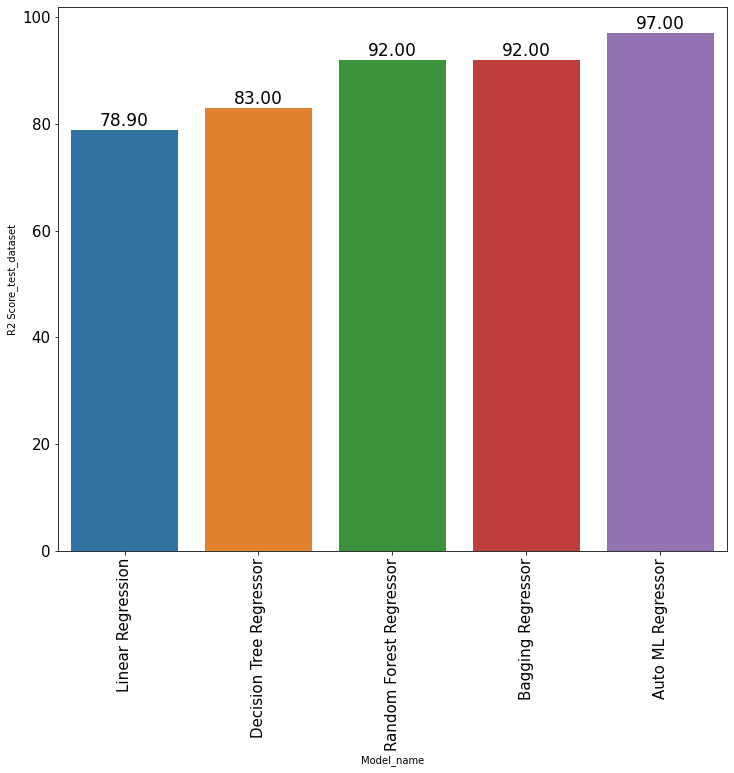

In [204]:
plt.figure(figsize=[12,10])
g=sns.barplot(x='Model_name',y='R2 Score_test_dataset',data=Regression_1)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
for p in g.patches:
    g.annotate('{:.2f}'.format(p.get_height()),(p.get_x()+0.4,p.get_height()),ha='center',va='bottom',color='black',fontsize=17)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [205]:
#  Auto ML model has a r2 score of 97% on the test dataset..

## Classification model using Auto ML to classify CCAO adjustment indicator:

In [206]:
df_1=df.copy()

In [207]:
df_1['CCAO adjustment indicator']=df_1['CCAO adjustment indicator'].apply(lambda x: 'No' if x==0 else 'Yes')

In [208]:
# Create an H2O dataframe with our data..
hf = h2o.H2OFrame(df_1)

#Dividing the data into train and test data using train_test_split from sklearn
np.random.seed(80)

train, test = hf.split_frame(ratios=[0.75], seed=80)

# define response column and predictor columns
y = 'CCAO adjustment indicator'
X = train.columns.remove(y)  

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [209]:
# create an AutoML model
aml = H2OAutoML(max_runtime_secs=600, seed=80)

# Fit the model
aml.train(x=X, y=y, training_frame=train)

AutoML progress: |
15:24:09.649: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_2_20230502_152409


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    96                 96                          134338                 15           15           15            41            326           106.167

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.00031017968638193046
RMSE: 0.017611918872795503
LogLoss: 0.0015420632091190435
Mean Per-Class Error: 0.008311542824661719
AUC: 0.9999808062327898
AUCPR: 0.9976786107009397
Gini: 0.9999616124655797

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3212127806598858
       No      Yes    Error    Rate
-----  ------  -----  -------  ---------------
No     149625  28     0.0002   (28.0/149653.0)
Yes    19      1137   0.0164   (19.0/1156.0)
Total  149644  1165   0.0003   (47.0/150809.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.321213     0.97975   227
max f2                       0.22932      0.986921  242
max f0point5                 0.562192     0.983738  187
max accuracy                 0.321213     0.999688  227
max precision                0.999853     1         0
max recall                   0.0155618    1         324
max specificity              0.999853     1         0
max absolute_mcc             0.321213     0.979601  227
max min_per_class_accuracy   0.0297072    0.99827   306
max mean_per_class_accuracy  0.0837017    0.998382  273
max tns                      0.999853     149653    0
max fns                      0.999853     1118      0
max fps                      4.92195e-05  149653    399
max tps                      0.0155618    1156      324
max tnr                      0.999853     1         0
max fnr                      0.999853     0.967128  0
max fpr                      4.92195e-05  1         399
max tpr                      0.0155618    1         324

Gains/Lift Table: Avg response rate:  0.77 %, avg score:  0.76 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.010006                    0.020824           99.7668   99.7668            0.764745         0.728534     0.764745                    0.728534            0.99827         0.99827                    9876.68   9876.68            0.995898
2        0.0200054                   0.00468169         0.173021  49.9864            0.00132626       0.00908452   0.383162                    0.368928            0.0017301       1                          -82.6979  4898.64            0.987565
3        0.0300048                   0.00260265         0         33.328             0                0.00346734   0.25547                     0.247135            0               1                          -100      3232.8             0.977488
4        0.0400042                   0.00174041         0         24.9973            0                0.00212373   0.191613                    0.185892            0               1                          -100      2399.73            0.967411
5        0.0500036                   0.00129169         0         19.9985            0                0.0014949

In [210]:
# get the best performing model
best_model = aml.leader

# make predictions on the testing set
preds = best_model.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [211]:
perf = best_model.model_performance(test_data=test)

# print metrics
print("Accuracy:", perf.accuracy())
print("Precision:", perf.precision())
print("sensitivity:", perf.sensitivity())
print("specificity:", perf.specificity())
print("AUC:", perf.auc())
print("Confusion matrix:\n", perf.confusion_matrix())

Accuracy: [[0.37420196522668225, 0.9984285799534541]]
Precision: [[0.9998552888839403, 1.0]]
sensitivity: [[6.326902352552516e-05, 1.0]]
specificity: [[0.9998552888839403, 1.0]]
AUC: 0.9921831189574839
Confusion matrix:
 Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37420196522668225
       No     Yes    Error    Rate
-----  -----  -----  -------  --------------
No     49856  21     0.0004   (21.0/49877.0)
Yes    58     338    0.1465   (58.0/396.0)
Total  49914  359    0.0016   (79.0/50273.0)


We can see that the Auto ML model has performed better than tuned manual model in terms of classifying minority class correctly
and having good sensitivity and specificity values.

In [212]:
Classification.loc[4]=['Auto ML Classifier',99]

In [213]:
Classification

,Model_name,AUC-ROC Score_test
0,Logisitc Regression,97
1,Decision Tree Classifier,84
2,Random Forest Classifier,79
3,AdBoost Classifier,77
4,Auto ML Classifier,99


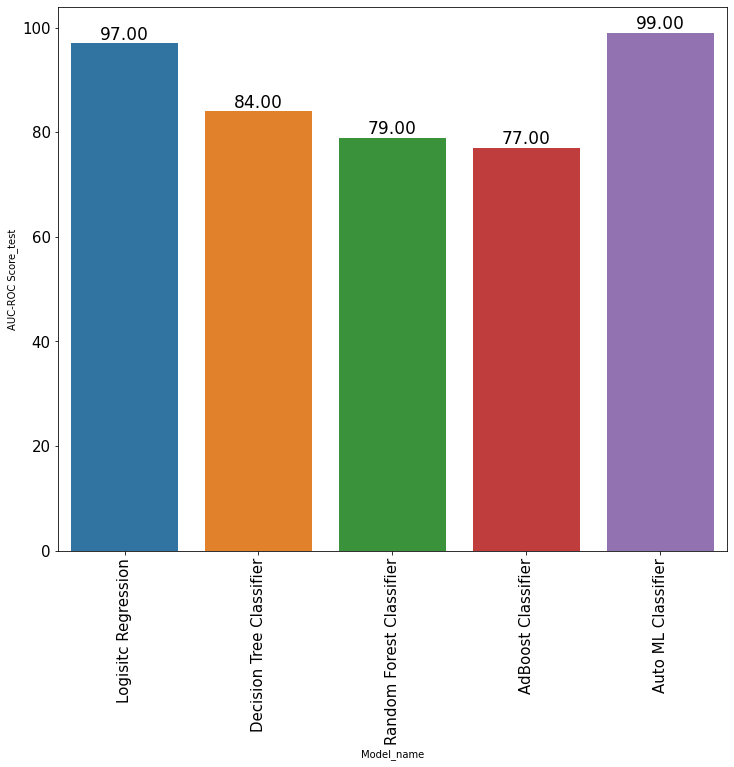

In [214]:
plt.figure(figsize=[12,10])
g=sns.barplot(x='Model_name',y='AUC-ROC Score_test',data=Classification)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
for p in g.patches:
    g.annotate('{:.2f}'.format(p.get_height()),(p.get_x()+0.4,p.get_height()),ha='center',va='bottom',color='black',fontsize=17)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

# Taxrate prediction using Auto ML:

In [215]:
# Create an H2O dataframe with our data..
hf = h2o.H2OFrame(df)

#Dividing the data into train and test data using train_test_split from sklearn
np.random.seed(80)

train, test = hf.split_frame(ratios=[0.75], seed=80)

# define response column and predictor columns
y = 'Tax Rate'
X = train.columns.remove(y)  

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [216]:
# create an AutoML model
aml = H2OAutoML(max_runtime_secs=600, seed=80)

# Fit the model
aml.train(x=X, y=y, training_frame=train)

AutoML progress: |
15:34:27.428: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_4_AutoML_3_20230502_153427


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    28                 28                          95627                  10           10           10            167           434           267.107

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0003506904522746253
RMSE: 0.01872673095536499
MAE: 0.0019963926483227753
RMSLE: 0.002148128950819495
Mean Residual Deviance: 0.0003506904522746253

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.0005656760712506675
RMSE: 0.023783945661951623
MAE: 0.00232436271489433
RMSLE: 0.002752354903105547
Mean Residual Deviance: 0.0005656760712506675

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     0.00232436   0.00025436   0.00255563    0.00238811    0.00240598    0.00238469    0.00188739
mean_residual_deviance  0.000565676  0.000127432  0.000762225   0.000449698   0.000474448   0.000618404   0.000523604
mse                     0.000565676  0.000127432  0.000762225   0.000449698   0.000474448   0.000618404   0.000523604
r2                      0.602932     0.0734737    0.548113      0.670204      0.68901       0.523672      0.583662
residual_deviance       0.000565676  0.000127432  0.000762225   0.000449698   0.000474448   0.000618404   0.000523604
rmse                    0.0236693    0.00260779   0.0276084     0.0212061     0.0217818     0.0248677     0.0228824
rmsle                   0.00273976   0.00029401   0.0031795     0.00244755    0.00252052    0.00286611    0.00268514

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-05-02 15:43:11  33.999 sec  0                  0.0377674        0.0161809       0.00142638
    2023-05-02 15:43:12  35.284 sec  5                  0.0317344        0.0102449       0.00100707
    2023-05-02 15:43:13  36.603 sec  10                 0.0276074        0.00669414      0.00076217
    2023-05-02 15:43:15  37.957 sec  15                 0.0234491        0.00445621      0.000549859
    2023-05-02 15:43:16  39.213 sec  20                 0.0209989        0.00310995      0.000440952
    2023-05-02 15:43:17  40.303 sec  25                 0.0193952        0.00231371      0.000376175
    2023-05-02 15:43:18  40.994 sec  28                 0.0187267        0.00199639      0.00035069

Variable Importances: 
variable                                                 relative_importance    scaled_importance      percentage
-------------------------------------------------------  ---------------------  ---------------------  ----------------------
Tax code                                                 273.7928161621094      1.0                    0.36809101513442555
Property Zip Code                                        65.33349609375         0.2386238507261156     0.08783529544906153
area_num_1                                               39.67328643798828      0.14490258361818453    0.05333733909961853
Comm - Share of Population that is Hispanic or Latino    29.347240447998047     0.10718776649940262    0.03945485378075688
Elementary/Middle School District                        25.321399688720703     0.09248379867544886    0.03404245533793381
High School District                             

In [217]:
# get the best performing model
best_model = aml.leader

# make predictions on the testing set
preds = best_model.predict(test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [218]:
best_model.r2()

0.7541388477219546

In [219]:
Regression_2.loc[1]=['Auto ML Regressor',75]

In [220]:
Regression_2

,Model_name,R2 Score_test_dataset
0,Random Forest Regressor,67
1,Auto ML Regressor,75


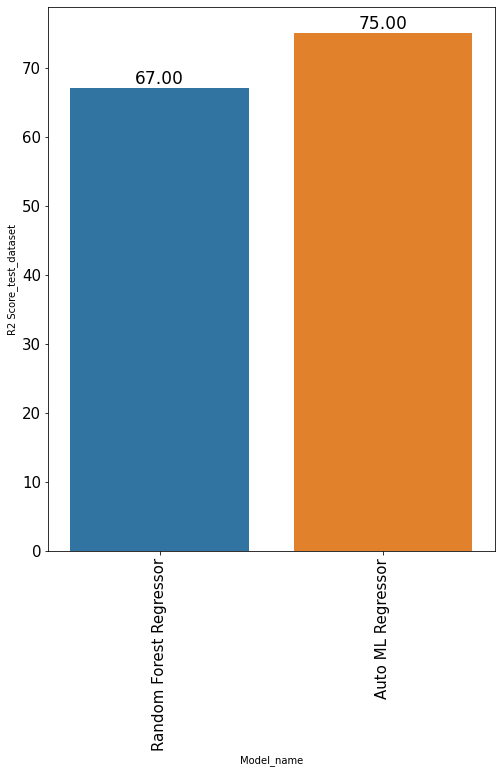

In [221]:
plt.figure(figsize=[8,10])
g=sns.barplot(x='Model_name',y='R2 Score_test_dataset',data=Regression_2)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
for p in g.patches:
    g.annotate('{:.2f}'.format(p.get_height()),(p.get_x()+0.4,p.get_height()),ha='center',va='bottom',color='black',fontsize=17)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In comparison Auto ML code has performed more consistently on the test dataset with r2 score of 75% while compared to r2 score of 67% by our tuned random forest model.

We also have a list of variables along with their importance in the model, we can say that the top 5 important variables are as:
    
1. Tax code

2. Property Zip Code

3. area_num_1

4. Comm - Share of Population that is Hispanic or Latino

5. Elementary/Middle School District

There variables can be used as inputs in the dashboard to predict the tax rates effectively and accurately.

In [222]:
#The variables Tax code and Property Zip Code are common on both manual model and Auto ML results..

# Neural Network Model:

In [223]:
scaler=MinMaxScaler()

#Dividing the data into train and test data using train_test_split from sklearn
np.random.seed(0)
df_train,df_test=train_test_split(df,train_size=0.7,random_state=100)


col=list(df_train.columns)
l1=['CCAO adjustment indicator','Central Air Conditioning','Flood Risk Factor','Flood Risk Direction']
col = [ele for ele in col if ele not in l1]


df_train[col]=scaler.fit_transform(df_train[col])

df_test[col]=scaler.transform(df_test[col])


X_train = df_train.drop(['CCAO certified AV','CCAO mailed AV','target_difference'],axis=1)
y_train = df_train.target_difference
X_test = df_test.drop(['CCAO certified AV','CCAO mailed AV','target_difference'],axis=1)
y_test = df_test.target_difference   

In [224]:
X_train.head()

,area_num_1,censustrac,chicagowar,commission,community,congressio,politicalt,staterepre,statesenat,Class,Township name,Township,CCAO Neighborhood,Tax code,BOR certified AV (final),CCAO adjustment indicator,Property Class,Township Code2,Neighborhood Code,Township Neighborhood Only,Land Square Feet,Age,Wall Material,Rooms,Bedrooms,Basement,Basement Finish,Central Heating,Central Air Conditioning,Attic Type,Full Baths,Half Baths,Garage 1 Size,Garage 1 Material,Building Square Feet,Type of Residence,Property Zip Code,Flood Risk Factor,Flood Risk Direction,Elementary/Middle School District,High School District,Tax Rate,Tract Median Income,CommsortIndex,Community Area,Comm VGentIndex- 1970,Comm VGentIndex- 1980,Comm VGentIndex- 1990,Comm VGentIndex- 2000,Comm VGentIndex- 2010,Comm VGentIndex- 1970-2010,Comm - Single Family,Comm - Condominium,Comm - Building with 2-4 Units,Comm - Building with 5+ Units,Comm - Cost-Burdened Owner-Occupied Households,Comm - Cost-Burdened Renter-Occupied Household,Comm - Share of All Households Cost-Burdened,Comm - Share of Households that are Owner-Occupied,Comm - Share of Households that are Renter-Occupied,Comm - Total Households,Comm - Share of Population that is under the Poverty Level,Comm - Share of Households with Income Less than $25000,Comm - Share of Households with Income $25000 to $50000,Comm - Share of Households with Income $50000 to $100000,Comm - Share of Households with Income $100000 or More,Comm - Total Households_[0],Comm - Share of Population that is White,Comm - Share of Population that is African American,Comm - Share of Population that is Hispanic or Latino,Comm - Share of Population that is Asian,Comm - Share of Population that is Some Other Race,Comm - Share of Population Aged under 18,Comm - Share of Population Aged 18 to 44,Comm - Share of Population Aged 45 to 64,Comm - Share of Population Aged over 65,Comm - Total Population
201023,0.68,0.62,0.67,0.27,0.96,0.00,0.57,0.35,0.34,0.00,0.29,0.29,0.54,0.28,0.00,0,0.50,0.29,0.32,0.54,0.02,0.46,0.00,0.18,0.30,1.00,1.00,1.00,1,0.50,0.20,0.00,0.25,0.00,0.14,0.00,0.37,1,0,0.39,0.20,0.07,0.16,0.96,0.96,0.73,0.27,0.36,0.18,0.08,0.05,0.81,0.01,0.29,0.09,0.47,0.73,0.56,0.68,0.32,0.15,0.39,0.40,0.70,0.67,0.24,0.15,0.00,0.95,0.06,0.00,0.37,0.51,0.19,0.59,0.50,0.25
149080,0.13,0.12,0.90,0.73,0.47,0.50,0.00,0.23,0.24,0.00,0.14,0.14,0.66,0.14,0.01,0,0.50,0.14,0.19,0.66,0.02,0.47,0.67,0.27,0.30,0.33,1.00,0.33,1,0.00,0.20,0.00,0.50,0.00,0.15,0.00,0.45,1,0,0.77,0.93,0.06,0.35,0.46,0.47,0.86,0.82,0.82,0.82,0.75,0.38,0.54,0.14,0.45,0.14,0.45,0.32,0.37,0.70,0.30,0.17,0.12,0.13,0.36,0.83,0.58,0.17,0.74,0.01,0.27,0.13,0.50,0.38,0.22,0.75,0.51,0.26
47461,0.84,0.77,0.24,0.67,0.95,0.25,0.57,0.27,0.26,0.00,0.29,0.29,0.03,0.28,0.01,0,0.00,0.29,0.28,0.03,0.02,0.33,0.67,0.23,0.30,0.33,0.50,1.00,1,0.00,0.20,0.12,0.50,0.67,0.11,0.00,0.42,1,0,0.48,0.04,0.08,0.23,0.95,0.95,0.73,0.82,0.82,0.55,0.33,0.21,0.81,0.11,0.23,0.06,0.45,0.67,0.48,0.77,0.23,0.15,0.20,0.20,0.72,0.86,0.33,0.15,0.15,0.02,0.92,0.01,0.06,0.62,0.33,0.39,0.25,0.30
57560,0.13,0.12,0.90,0.60,0.47,0.50,0.00,0.23,0.24,0.00,0.14,0.14,0.00,0.14,0.01,0,0.50,0.14,0.14,0.00,0.02,0.38,0.67,0.32,0.40,0.33,1.00,1.00,1,0.00,0.20,0.12,0.50,0.00,0.17,0.25,0.44,1,0,0.32,0.93,0.06,0.45,0.46,0.47,0.86,0.82,0.82,0.82,0.75,0.38,0.54,0.14,0.45,0.14,0.45,0.32,0.37,0.70,0.30,0.17,0.12,0.13,0.36,0.83,0.58,0.17,0.74,0.01,0.27,0.13,0.50,0.38,0.22,0.75,0.51,0.26
185374,0.12,0.11,0.82,0.53,0.71,0.50,0.00,0.25,0.24,0.00,0.14,0.14,0.68,0.14,0.02,0,0.50,0.14,0.20,0.68,0.02,0.46,0.67,0.32,0.40,0.33,1.00,1.00,0,1.00,0.20,0.12,0.25,0.00,0.17,0.25,0.47,1,0,0.70,0.93,0.06,0.38,0.71,0.71,0.91,0.91,0.91,0.86,0.75,0.36,0.82,0.12,0.15,0.11,0.19,0.39,0.22,0.81,0.19,0.25,0.07,0.12,0.25,0.74,0.68,0.25,0.93,0.00,0.16,0.06,0.50,0.36,0.14,0.79,0.66,0.36


In [225]:
y_train.head()

201023   0.00
149080   0.02
47461    0.01
57560    0.02
185374   0.03
Name: target_difference, dtype: float64

In [226]:
from sklearn.neural_network import MLPRegressor

In [227]:
nn= MLPRegressor(hidden_layer_sizes=(5), activation='relu',random_state=80)

In [228]:
nn.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 5,
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 80,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [229]:
nn.fit(X_train,y_train)

MLPRegressor(hidden_layer_sizes=5, random_state=80)

In [230]:
nn.score(X_train,y_train)

0.6360347544250382

### Hyperparameter tuning:

In [231]:
# Create the parameter grid based on the results of random search 
params = {
    'hidden_layer_sizes': [5,7,9,12,15],
    'alpha': [0.0001,0.00025,0.0005,0.00075,0.001],
    'activation': ['relu','tanh','logistic','identity'],
    'learning_rate': ['adaptive','constant','invscaling'],
    'solver' : ['lbfgs', 'sgd', 'adam']
}

In [232]:
nn_random = RandomizedSearchCV(estimator = nn,param_distributions = params, cv = 5, verbose=2, random_state=80,n_jobs=-1)

In [233]:
nn_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(hidden_layer_sizes=5,
                                          random_state=80),
                   n_jobs=-1,
                   param_distributions={'activation': ['relu', 'tanh',
                                                       'logistic', 'identity'],
                                        'alpha': [0.0001, 0.00025, 0.0005,
                                                  0.00075, 0.001],
                                        'hidden_layer_sizes': [5, 7, 9, 12, 15],
                                        'learning_rate': ['adaptive',
                                                          'constant',
                                                          'invscaling'],
                                        'solver': ['lbfgs', 'sgd', 'adam']},
                   random_state=80, verbose=2)

In [234]:
nn_random.best_params_

{'solver': 'adam',
 'learning_rate': 'invscaling',
 'hidden_layer_sizes': 7,
 'alpha': 0.0001,
 'activation': 'logistic'}

In [235]:
nn=MLPRegressor(hidden_layer_sizes=(12), activation='tanh',alpha=0.0005,random_state=80)

In [236]:
nn.fit(X_train,y_train)

MLPRegressor(activation='tanh', alpha=0.0005, hidden_layer_sizes=12,
             random_state=80)

In [237]:
y_train_pred = nn.predict(X_train)
r2_score(y_train, y_train_pred)

0.6786255409792774

### Test dataset predictions:

In [238]:
y_pred=nn.predict(X_test)

In [239]:
r2_score(y_test,y_pred)

0.7057397683623083

Our Neural Network has prredicted the target variable with a r2 score of 67% on train dataset and 70% on test dataset.

In comparision, Auto ML model has performed better on test dataset with 97% r2 score while comparing to r2 score of 70% by the tuned neural network.